# Initial Data Analysis for E-commerce

## Overview
This section provides a comprehensive guide and code framework for performing initial data analysis on an e-commerce dataset. The notebook is structured to facilitate data cleansing, exploration, and preliminary analysis, setting a solid foundation for more detailed analytics and modeling.

## Notebook Outline:
1. **Data Loading and Initial Assessment:**
    - Load the data from a CSV file.
    - Display basic information about the dataset including data types and statistics.

2. **Data Cleaning:**
    - Remove unnecessary columns that do not contribute to the analysis.
    - Standardize column names to ensure consistency and ease of access.
    - Handle duplicate records and data type inconsistencies.
    - Deal with missing values appropriately based on the context and significance of the data.

3. **Exploratory Data Analysis (EDA):**
    - Analyze distribution and trends within key variables such as Sales, Profit, Quantity, and Discount.
    - Explore relationships between different variables using visualizations like histograms, scatter plots, and bar charts.
    - Identify and analyze outliers and anomalies in the data, such as extremely high or low sales or profit values.

4. **Feature Engineering:**
    - Derive new metrics or features from existing data, such as calculating processing times from order and ship dates.
    - Categorize data based on logical groupings or business rules, like classifying customers by frequency of purchases or creating customer segments.

5. **Data Export:**
    - Save the cleaned and transformed data back to a CSV file for further analysis or use in subsequent stages of the project.

## Tools and Libraries Used:
- Pandas for data manipulation and analysis.
- NumPy for numerical operations.
- Matplotlib and Seaborn for plotting and visualization.
- Regex (re) for text pattern matching during data cleaning.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Set option to display all columns of the DataFrame
pd.set_option('display.max_columns', None)

In [3]:
data_path = '../data/ecommerce.csv'

try:
    df = pd.read_csv(data_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(data_path, encoding='ISO-8859-1')  # Using ISO-8859-1 if UTF-8 fails


### Initial Data Assessment

In [4]:
df.head()

,SeqID,OrderID,Data_Ordered,Date_Shipped,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.582
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.031
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SeqID          9994 non-null   int64  
 1   OrderID        9994 non-null   object 
 2   Data_Ordered   9994 non-null   object 
 3   Date_Shipped   9981 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9942 non-null   float64
 18  Quantity

In [6]:
# Display column statistics
df.describe()

,SeqID,Postal Code,Sales,Quantity,Discount
count,9994.000000,9994.000000,9942.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.228372,3.774765,0.156203
std,2885.163629,32063.693350,623.414782,2.250143,0.206452
min,1.000000,1040.000000,0.444000,-9.000000,0.000000
25%,2499.250000,23223.000000,17.256000,2.000000,0.000000
50%,4997.500000,56430.500000,54.384000,3.000000,0.200000
75%,7495.750000,90008.000000,209.769000,5.000000,0.200000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000


In [7]:
# Check for the number of unique values in each column
df.nunique()

SeqID            9994
OrderID          5009
Data_Ordered     1240
Date_Shipped     1338
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5804
Quantity           22
Discount           12
Profit           7285
dtype: int64

## Data Overview

**Total Records:** 9,994 entries

### Attributes:

- **SeqID:** A sequence identifier.
- **OrderID:** Unique identifier for each order.
- **Date Ordered:** Date when the order was placed.
- **Date Shipped:** Date when the order was shipped.
- **Ship Mode:** Shipping mode (e.g., Second Class, Standard Class).
- **Customer ID:** Unique identifier for each customer.
- **Customer Name:** Name of the customer.
- **Segment:** Customer segment (e.g., Consumer, Corporate).
- **Country, City, State, Postal Code, Region:** Geographic information.
- **Product ID:** Unique identifier for each product.
- **Category:** Product category (e.g., Furniture, Office Supplies).
- **Sub-Category:** Subcategory of the product (e.g., Bookcases, Chairs).
- **Product Name:** Name of the product.
- **Sales:** Sales amount.
- **Quantity:** Quantity of items per order.
- **Discount:** Discount applied to the order.
- **Profit:** Profit from the order.


### Step 1: Remove unnecessary columns

### Considerations

#### 1. SeqID
- **Reason for Removal:** If SeqID is merely a sequential identifier that adds no value beyond what OrderID already provides (unique identification of orders), it's redundant and can be removed.
- **Decision Basis:** It does not influence analysis outcomes and is not necessary for relational joins or historical tracking.

#### 2. Customer Name
- **Reason for Removal:** In many analytical contexts, especially those sensitive to data privacy, detailed personally identifiable information (PII) such as Customer Name might be unnecessary. As personalized marketing isn't part of the analysis, we could drop this to comply with privacy standards.
- **Decision Basis:** Reducing privacy risks and focusing on non-PII for customer analysis.

$#### 3. Postal Code
- **Reason for Removal:** Depending on the granularity of the geographic analysis, Postal Code might be too detailed, particularly as we already have City and Region which provide sufficient geographical segmentation.
- **Decision Basis:** Simplifying the geographic analysis without significantly impacting the ability to perform meaningful regional market analysis.$

$####  4. Product Name
- **Reason for Removal:** Product ID and Category/Sub-Category adequately describe the product for our analysis needs.
- **Decision Basis:** It does not influence analysis outcomes.$

#### 5. Country
- **Reason for Removal:** The "Country" column provides no additional information as it contains only the single value "United States".
- **Decision Basis:** Since it lacks diversity and does not align with specific analytical goals, it can be removed to streamline the dataset.

In [8]:
def drop_columns(df, columns_to_drop):

    # Check if all columns to drop are in the DataFrame
    missing_cols = [col for col in columns_to_drop if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Columns not found in DataFrame: {', '.join(missing_cols)}")

    # Drop the columns and return the new DataFrame
    return df.drop(columns=columns_to_drop)

In [9]:
# Columns to be removed
columns_to_drop = ['SeqID', 'Customer Name', 'Country'] #'Postal Code','Product Name'

In [10]:
df = drop_columns(df, columns_to_drop)

In [11]:
df.columns

Index(['OrderID', 'Data_Ordered', 'Date_Shipped', 'Ship Mode', 'Customer ID',
       'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

### Step 2: Handling column name inconsistencies

In [12]:
# To ensure consistency and ease of use, standardize the column names of the dataframe. 
def clean_column_names(raw_data):
    
    # Input validation
    if not isinstance(raw_data, pd.DataFrame):
        raise ValueError("Input 'raw_data' is not a valid DataFrame.")

    # Create a defensive copy of the DataFrame
    cleaned_data = raw_data.copy()
    
    # Clean column names
    cleaned_data.columns = cleaned_data.columns.str.strip().str.replace(' ', '_').str.lower().str.replace('[^\w]', '', regex=True)
    
    return cleaned_data

In [13]:
df = clean_column_names(df)
df.columns

Index(['orderid', 'data_ordered', 'date_shipped', 'ship_mode', 'customer_id',
       'segment', 'city', 'state', 'postal_code', 'region', 'product_id',
       'category', 'subcategory', 'product_name', 'sales', 'quantity',
       'discount', 'profit'],
      dtype='object')

In [14]:
# Renames the column names of the given date frame with according to the specified column_names dictionary
# Example column_names={'st': 'state'}

def rename_column_names(raw_data, column_names):
    if not isinstance(raw_data, pd.DataFrame) or raw_data.empty:
        raise ValueError("Input 'raw_data' must be a non-empty DataFrame.")
    
    if not isinstance(column_names, dict):
        raise ValueError("Input 'column_names' must be a dictionary.")
    
    existing_columns = set(raw_data.columns)
    
    new_columns = set(column_names.values())
    
    if not new_columns.isdisjoint(existing_columns):
        raise ValueError("New column names should not overlap with existing column names.")
    
    for key in column_names:
        if key not in existing_columns:
            raise ValueError(f"Column '{key}' does not exist in the DataFrame.")
    
    raw_data = raw_data.rename(columns=column_names)
    return raw_data

In [15]:
df = rename_column_names(df,{
    'data_ordered': 'date_ordered',
    'orderid': 'order_id'
})
df.columns

Index(['order_id', 'date_ordered', 'date_shipped', 'ship_mode', 'customer_id',
       'segment', 'city', 'state', 'postal_code', 'region', 'product_id',
       'category', 'subcategory', 'product_name', 'sales', 'quantity',
       'discount', 'profit'],
      dtype='object')

### Step 3: Removing duplicates (if any)

Eliminating any duplicate rows to ensure the integrity of the dataset.

In [16]:
df.duplicated().sum()

1

In [17]:
df[df.duplicated()]

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Home Office,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [18]:
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)

duplicate_rows

1

### Step 4: Fixing Data Types

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      9993 non-null   object 
 1   date_ordered  9993 non-null   object 
 2   date_shipped  9980 non-null   object 
 3   ship_mode     9993 non-null   object 
 4   customer_id   9993 non-null   object 
 5   segment       9993 non-null   object 
 6   city          9993 non-null   object 
 7   state         9993 non-null   object 
 8   postal_code   9993 non-null   int64  
 9   region        9993 non-null   object 
 10  product_id    9993 non-null   object 
 11  category      9993 non-null   object 
 12  subcategory   9993 non-null   object 
 13  product_name  9993 non-null   object 
 14  sales         9941 non-null   float64
 15  quantity      9993 non-null   int64  
 16  discount      9993 non-null   float64
 17  profit        9993 non-null   object 
dtypes: float64(2), int64(2), object(1

In [20]:
# Convert date_ordered and date_shipped to datetime
df['date_ordered'] = pd.to_datetime(df['date_ordered'])
df['date_shipped'] = pd.to_datetime(df['date_shipped'], errors='coerce')  # Coerce errors in case of bad formatting

# Attempt to convert 'sales' and 'profit' to numeric, coercing errors to NaN (which helps identify non-numeric values)
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['profit'] = pd.to_numeric(df['profit'], errors='coerce')


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      9993 non-null   object        
 1   date_ordered  9993 non-null   datetime64[ns]
 2   date_shipped  9977 non-null   datetime64[ns]
 3   ship_mode     9993 non-null   object        
 4   customer_id   9993 non-null   object        
 5   segment       9993 non-null   object        
 6   city          9993 non-null   object        
 7   state         9993 non-null   object        
 8   postal_code   9993 non-null   int64         
 9   region        9993 non-null   object        
 10  product_id    9993 non-null   object        
 11  category      9993 non-null   object        
 12  subcategory   9993 non-null   object        
 13  product_name  9993 non-null   object        
 14  sales         9941 non-null   float64       
 15  quantity      9993 non-null   int64        

### Step 5: Handling raws with missing values

In [22]:
# Check for missing values
print(df.isnull().sum())

order_id         0
date_ordered     0
date_shipped    16
ship_mode        0
customer_id      0
segment          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
subcategory      0
product_name     0
sales           52
quantity         0
discount         0
profit           3
dtype: int64


In [23]:
df[df['sales'].isnull()]

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
533,CA-2016-168753,2016-05-29,2016-06-01,Second Class,RL-19615,Consumer,Montgomery,Alabama,36116,South,TEC-PH-10000984,Technology,Phones,Panasonic KX-TG9471B,NaN,5,0.0,274.3860
534,CA-2016-168753,2016-05-29,2016-06-01,Second Class,RL-19615,Consumer,Montgomery,Alabama,36116,South,OFF-BI-10002557,Office Supplies,Binders,Presstex Flexible Ring Binders,NaN,5,0.0,11.3750
1269,CA-2017-100426,2017-06-04,2017-06-08,Standard Class,DC-12850,Consumer,Florence,Alabama,35630,South,OFF-PA-10002870,Office Supplies,Paper,"Ampad Phone Message Book, Recycled, 400 Messag...",NaN,2,0.0,5.6160
1431,CA-2014-120768,2014-12-19,2014-12-21,Second Class,IM-15070,Consumer,Florence,Alabama,35630,South,OFF-BI-10001191,Office Supplies,Binders,Canvas Sectional Post Binders,NaN,6,0.0,74.8524
1432,CA-2014-120768,2014-12-19,2014-12-21,Second Class,IM-15070,Consumer,Florence,Alabama,35630,South,OFF-SU-10004115,Office Supplies,Supplies,Acme Stainless Steel Office Snips,NaN,1,0.0,1.9629
1433,CA-2014-120768,2014-12-19,2014-12-21,Second Class,IM-15070,Consumer,Florence,Alabama,35630,South,FUR-CH-10000513,Furniture,Chairs,High-Back Leather Manager's Chair,NaN,14,0.0,163.7874
1451,CA-2016-133711,2016-11-26,2016-11-29,First Class,MC-17425,Corporate,Mobile,Alabama,36608,South,OFF-PA-10001685,Office Supplies,Paper,Easy-staple paper,NaN,7,0.0,34.7802
1452,CA-2016-133711,2016-11-26,2016-11-29,First Class,MC-17425,Corporate,Mobile,Alabama,36608,South,OFF-BI-10000666,Office Supplies,Binders,Surelock Post Binders,NaN,3,0.0,45.8400
1453,CA-2016-133711,2016-11-26,2016-11-29,First Class,MC-17425,Corporate,Mobile,Alabama,36608,South,OFF-BI-10004352,Office Supplies,Binders,Wilson Jones DublLock D-Ring Binders,NaN,5,0.0,16.8750
1454,CA-2016-133711,2016-11-26,2016-11-29,First Class,MC-17425,Corporate,Mobile,Alabama,36608,South,TEC-MA-10000010,Technology,Machines,Hewlett-Packard Deskjet 3050a All-in-One Color...,NaN,8,0.0,1459.2000


Missing `Sales` data might be problematic because it directly affects revenue and profitability analyses. The absence could be due to data entry errors or transactions not being completed at the time of data extraction.

As the percentage of missing Sales data is small, imputation might be a viable option, especially considering that other metrics (like quantities and product types) are intact and typical transaction values can be reasonably estimated. If detailed analyses of sales figures are essential: It might be safer to remove these entries to avoid skewing results with imputed values that could be significantly off-mark.

Considering the following options: 

- Option 1: Impute missing sales 
- Option 2: Remove these records as they are a small fraction of the dataset

In [24]:
df[df['date_shipped'].isnull()]

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
68,CA-2014-106376,2014-12-05,NaT,Standard Class,BS-11590,Corporate,Gilbert,Arizona,85234,West,TEC-PH-10002726,Technology,Phones,netTALK DUO VoIP Telephone Service,167.968,4,0.2,62.9880
126,US-2017-107272,2017-11-05,NaT,Standard Class,TS-21610,Consumer,Phoenix,Arizona,85023,West,OFF-BI-10003274,Office Supplies,Binders,"Avery Durable Slant Ring Binders, No Labels",2.388,2,0.7,-1.8308
127,US-2017-107272,2017-11-05,NaT,Standard Class,TS-21610,Consumer,Phoenix,Arizona,85023,West,OFF-ST-10002974,Office Supplies,Storage,"Trav-L-File Heavy-Duty Shuttle II, Black",243.992,7,0.2,30.4990
151,CA-2016-158834,2016-03-13,NaT,First Class,TW-21025,Home Office,Scottsdale,Arizona,85254,West,OFF-AP-10000326,Office Supplies,Appliances,Belkin 7 Outlet SurgeMaster Surge Protector wi...,157.920,5,0.2,17.7660
152,CA-2016-158834,2016-03-13,NaT,First Class,TW-21025,Home Office,Scottsdale,Arizona,85254,West,TEC-PH-10001254,Technology,Phones,Jabra BIZ 2300 Duo QD Duo Corded Headset,203.184,2,0.2,15.2388
372,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,Tucson,Arizona,85705,West,OFF-BI-10001982,Office Supplies,Binders,Wilson Jones Custom Binder Spines & Labels,8.160,5,0.7,-5.7120
373,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,Tucson,Arizona,85705,West,TEC-AC-10003911,Technology,Accessories,NETGEAR AC1750 Dual Band Gigabit Smart WiFi Ro...,1023.936,8,0.2,179.1888
374,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,Tucson,Arizona,85705,West,OFF-AR-10000658,Office Supplies,Art,Newell 324,9.240,1,0.2,0.9240
375,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,Tucson,Arizona,85705,West,TEC-AC-10002076,Technology,Accessories,Microsoft Natural Keyboard Elite,479.040,10,0.2,-29.9400
462,CA-2016-109869,2016-04-22,NaT,Standard Class,TN-21040,Home Office,Phoenix,Arizona,85023,West,FUR-FU-10000023,Furniture,Furnishings,Eldon Wave Desk Accessories,23.560,5,0.2,7.0680


In [25]:

# Display the range of dates in Date_Ordered and Date_Shipped
print("Date Ordered range: ", df['date_ordered'].min(), "to", df['date_ordered'].max())
print("Date Shipped range: ", df['date_shipped'].min(), "to", df['date_shipped'].max())


Date Ordered range:  1914-09-20 00:00:00 to 2017-12-30 00:00:00
Date Shipped range:  2014-01-07 00:00:00 to 2034-09-19 00:00:00


**Decision: Considering time limitations, decided to drop rows with null values in either the 'Sales' or 'Date Shipped' columns. This approach allows to focus on analyzing complete data while acknowledging that missing values may impact the accuracy of the analysis. We may revisit this decision in the future to explore predictive methods for filling in missing values.** 

### Order ID

In [26]:
df['order_id'].nunique()

5009

In [27]:
df['order_id'].value_counts().head(10)

order_id
CA-2017-100111    14
CA-2017-157987    12
US-2016-108504    11
CA-2016-165330    11
CA-2016-105732    10
CA-2015-131338    10
US-2015-126977    10
CA-2015-158421     9
US-2016-114013     9
US-2015-163433     9
Name: count, dtype: int64

**Unique Order IDs**: There are 5,009 unique order IDs, suggesting that some orders consist of multiple line items (entries) in the dataset.

**Top 10 Most Frequent Order IDs**: The most frequent order ID appears 14 times, indicating multiple products or transactions are grouped under a single order ID.

This pattern is typical for sales data, where an order can contain multiple products. Each row represents a specific product or transaction within an order, not necessarily a unique order.

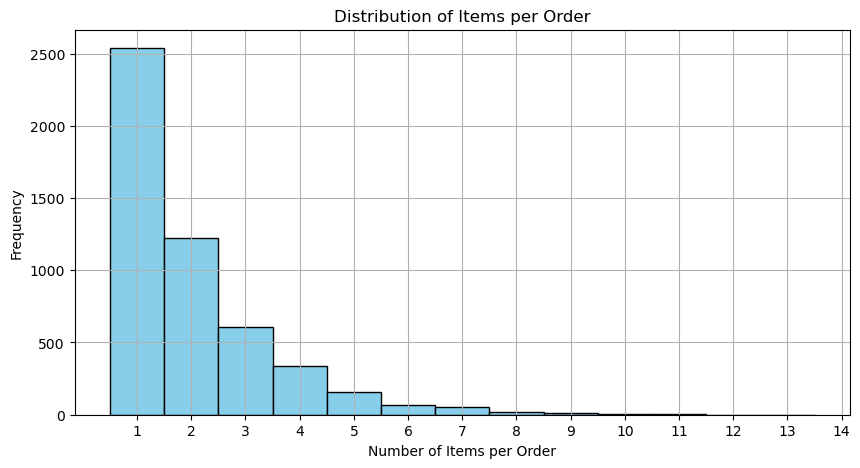

count    5009.000000
mean        1.995009
std         1.410458
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        14.000000
Name: count, dtype: float64

In [28]:
# Count the frequency of each OrderID
order_item_counts = df['order_id'].value_counts()

# Plot the distribution of items per order
plt.figure(figsize=(10, 5))
plt.hist(order_item_counts, bins=range(1, order_item_counts.max()+1), align='left', color='skyblue', edgecolor='black')
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items per Order')
plt.ylabel('Frequency')
plt.xticks(range(1, order_item_counts.max()+1))
plt.grid(True)
plt.show()

order_item_counts.describe()

The distribution of items per order shows the following:

- Mean: Approximately 2 items per order.
- Median: 1 item per order, indicating that most orders consist of a single item.
- Maximum: Some orders contain up to 14 items.

From the histogram, it's evident that a significant number of orders contain just one item, but there are also quite a few orders with multiple items, showing variability in order composition.


In [29]:
# Filter the data to include only orders with more than one item
#multiple_item_orders = df[df['order_id'].isin(order_item_counts[order_item_counts > 1].index)]

# Explore the top categories and sub-categories that appear in multiple item orders
#category_counts = multiple_item_orders['category'].value_counts()
#sub_category_counts = multiple_item_orders['subcategory'].value_counts()


In [30]:
#category_counts

In [31]:
#sub_category_counts

In [32]:
# Calculate the total sales and quantities for each OrderID in multiple item orders
#order_sales_quantities = multiple_item_orders.groupby('order_id').agg({'sales': 'sum', 'quantity': 'sum'})

# Summary statistics for total sales and quantities per order
#sales_quantities_stats = {
#    "Total Sales Statistics": order_sales_quantities['sales'].describe(),
#    "Total Quantity Statistics": order_sales_quantities['quantity'].describe()
#}

#sales_quantities_stats


### Date Ordered

In [33]:
df['date_ordered'].dtype

dtype('<M8[ns]')

In [34]:
df['date_ordered'].head()

0   2016-11-08
1   2016-11-08
2   2016-06-12
3   2015-10-11
4   2015-10-11
Name: date_ordered, dtype: datetime64[ns]

In [35]:
df['date_ordered'].min(), df['date_ordered'].max()

(Timestamp('1914-09-20 00:00:00'), Timestamp('2017-12-30 00:00:00'))

There are no missing values in the date_ordered column, and the data covers a date range from September 20, 1914, to December 30, 2017. The presence of a very early date, like 1914, could be an anomaly or data entry error, considering the context of an e-commerce dataset.

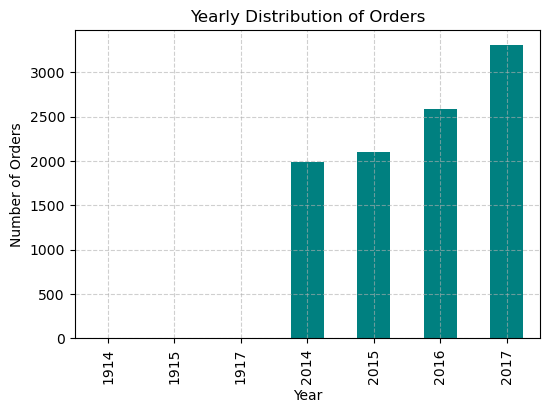

date_ordered
1914       1
1915       1
1917       1
2014    1991
2015    2101
2016    2587
2017    3311
Name: count, dtype: int64

In [36]:
# Extract year from 'date_ordered' and count the number of orders per year
orders_per_year = df['date_ordered'].dt.year.value_counts().sort_index()

# Plotting the yearly distribution of orders
plt.figure(figsize=(6, 4))
orders_per_year.plot(kind='bar', color='teal')
plt.title('Yearly Distribution of Orders')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

orders_per_year

The yearly distribution of orders reveals that the data primarily spans from 2014 to 2017, with a significant increase in the number of orders each year. The dates from 1914, 1915, and 1917 likely represent data errors since they each have only one order and don't fit the context of a modern e-commerce dataset.

In [37]:
df[df['date_ordered'].dt.year.isin([1914, 1915, 1917])]

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
794,CA-2014-156433,1914-09-20,2014-09-26,Standard Class,ES-14020,Consumer,San Francisco,California,94110,West,OFF-PA-10003724,Office Supplies,Paper,"Wirebound Message Book, 4 per Page",21.72,4,0.0,10.6428
969,CA-2017-135279,1917-04-09,2017-04-11,First Class,BS-11800,Home Office,New York City,New York,10011,East,OFF-ST-10001097,Office Supplies,Storage,Office Impressions Heavy Duty Welded Shelving ...,501.81,3,0.0,0.0000
1294,CA-2015-101707,1915-08-27,2015-09-01,Standard Class,PF-19165,Consumer,San Diego,California,92105,West,OFF-LA-10000134,Office Supplies,Labels,Avery 511,3.08,1,0.0,1.4784


To address the date anomalies for the years 1914, 1915, and 1917 in the `date_ordered` column, we'll assume these are typographical errors where "19" should have been "20". Specifically:

- 1914 should be corrected to 2014
- 1915 should be corrected to 2015
- 1917 should be corrected to 2017


In [38]:
# Correct the years in the 'Data_Ordered' column
df.loc[df['date_ordered'].dt.year == 1914, 'date_ordered'] = df['date_ordered'] + pd.DateOffset(years=100)
df.loc[df['date_ordered'].dt.year == 1915, 'date_ordered'] = df['date_ordered'] + pd.DateOffset(years=100)
df.loc[df['date_ordered'].dt.year == 1917, 'date_ordered'] = df['date_ordered'] + pd.DateOffset(years=100)

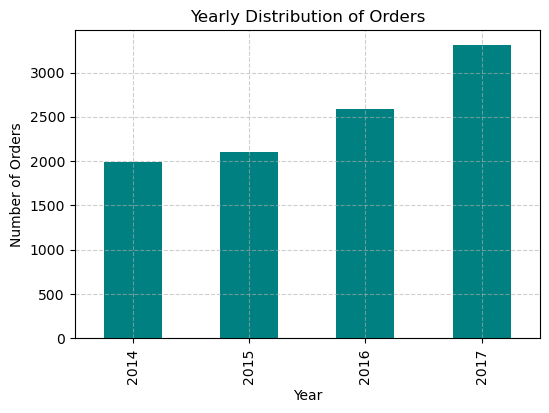

date_ordered
2014    1992
2015    2102
2016    2587
2017    3312
Name: count, dtype: int64

In [39]:
# Extract year from 'date_ordered' and count the number of orders per year
orders_per_year = df['date_ordered'].dt.year.value_counts().sort_index()

# Plotting the yearly distribution of orders
plt.figure(figsize=(6, 4))
orders_per_year.plot(kind='bar', color='teal')
plt.title('Yearly Distribution of Orders')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

orders_per_year

The date errors have been corrected for the entries that were originally from 1914, 1915, and 1917. The corrected dates now reflect the intended years of 2014, 2015, and 2017, respectively. Here are the corrected rows from the dataset:

- The entries previously dated 1917 are now correctly dated 2017.
- The entries previously dated 1915 are now correctly dated 2015.

These corrections ensure the accuracy of the dataset for any further time-series analysis or reporting.


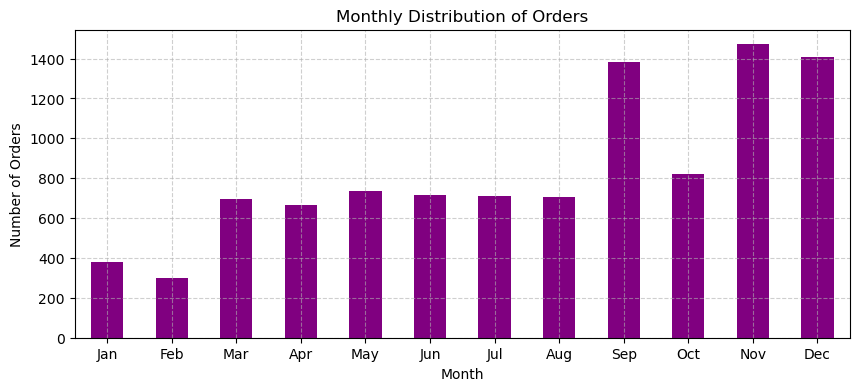

date_ordered
1      381
2      300
3      696
4      667
5      735
6      717
7      710
8      706
9     1383
10     819
11    1471
12    1408
Name: count, dtype: int64

In [40]:
# Extract month from 'date_ordered' and count the number of orders per month
orders_per_month = df['date_ordered'].dt.month.value_counts().sort_index()

# Plotting the yearly distribution of orders
plt.figure(figsize=(10, 4))
orders_per_month.plot(kind='bar', color='purple')
plt.title('Monthly Distribution of Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

orders_per_month

The monthly distribution of orders shows a clear pattern:

- There's a gradual increase in order volume starting from January, with noticeable spikes in September, November, and December. These months likely correspond to high shopping seasons due to back-to-school sales, Black Friday, and holiday shopping respectively.
- The lowest order volumes appear in February, which could be due to fewer days in the month and the post-holiday slowdown.

This seasonal trend is typical in retail and e-commerce, reflecting consumer buying habits that align with various events and holidays throughout the year.


### Date Shipped

In [41]:
df['date_shipped'].dtype

dtype('<M8[ns]')

In [42]:
df['date_shipped'].head()

0   2016-11-11
1   2016-11-11
2   2016-06-16
3   2015-10-18
4   2015-10-18
Name: date_shipped, dtype: datetime64[ns]

In [43]:
df['date_shipped'].min(), df['date_shipped'].max()

(Timestamp('2014-01-07 00:00:00'), Timestamp('2034-09-19 00:00:00'))

In [44]:
df['date_shipped'].isnull().sum()

16

In [45]:
df[df['date_shipped'].isnull()]

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
68,CA-2014-106376,2014-12-05,NaT,Standard Class,BS-11590,Corporate,Gilbert,Arizona,85234,West,TEC-PH-10002726,Technology,Phones,netTALK DUO VoIP Telephone Service,167.968,4,0.2,62.9880
126,US-2017-107272,2017-11-05,NaT,Standard Class,TS-21610,Consumer,Phoenix,Arizona,85023,West,OFF-BI-10003274,Office Supplies,Binders,"Avery Durable Slant Ring Binders, No Labels",2.388,2,0.7,-1.8308
127,US-2017-107272,2017-11-05,NaT,Standard Class,TS-21610,Consumer,Phoenix,Arizona,85023,West,OFF-ST-10002974,Office Supplies,Storage,"Trav-L-File Heavy-Duty Shuttle II, Black",243.992,7,0.2,30.4990
151,CA-2016-158834,2016-03-13,NaT,First Class,TW-21025,Home Office,Scottsdale,Arizona,85254,West,OFF-AP-10000326,Office Supplies,Appliances,Belkin 7 Outlet SurgeMaster Surge Protector wi...,157.920,5,0.2,17.7660
152,CA-2016-158834,2016-03-13,NaT,First Class,TW-21025,Home Office,Scottsdale,Arizona,85254,West,TEC-PH-10001254,Technology,Phones,Jabra BIZ 2300 Duo QD Duo Corded Headset,203.184,2,0.2,15.2388
372,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,Tucson,Arizona,85705,West,OFF-BI-10001982,Office Supplies,Binders,Wilson Jones Custom Binder Spines & Labels,8.160,5,0.7,-5.7120
373,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,Tucson,Arizona,85705,West,TEC-AC-10003911,Technology,Accessories,NETGEAR AC1750 Dual Band Gigabit Smart WiFi Ro...,1023.936,8,0.2,179.1888
374,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,Tucson,Arizona,85705,West,OFF-AR-10000658,Office Supplies,Art,Newell 324,9.240,1,0.2,0.9240
375,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,Tucson,Arizona,85705,West,TEC-AC-10002076,Technology,Accessories,Microsoft Natural Keyboard Elite,479.040,10,0.2,-29.9400
462,CA-2016-109869,2016-04-22,NaT,Standard Class,TN-21040,Home Office,Phoenix,Arizona,85023,West,FUR-FU-10000023,Furniture,Furnishings,Eldon Wave Desk Accessories,23.560,5,0.2,7.0680


In [46]:
# Summary of shipment data by year
shipments_per_year = df['date_shipped'].dt.year.value_counts().sort_index()
shipments_per_year

date_shipped
2014.0    1933
2015.0    2130
2016.0    2571
2017.0    3298
2018.0      42
2027.0       2
2034.0       1
Name: count, dtype: int64

In [47]:
df[df['date_shipped'].dt.year.isin([2027,2034])]

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
410,CA-2017-117457,2017-12-08,2027-12-12,Standard Class,KH-16510,Consumer,San Francisco,California,94110,West,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,28.350,9,0.0,13.6080
492,CA-2014-113362,2014-09-14,2034-09-19,Standard Class,AJ-10960,Consumer,Rochester,New York,14609,East,OFF-EN-10003845,Office Supplies,Envelopes,Colored Envelopes,11.070,3,0.0,5.0922
671,US-2017-106663,2017-06-09,2027-06-13,Standard Class,MO-17800,Home Office,Chicago,Illinois,60653,Central,OFF-PA-10002377,Office Supplies,Paper,Adams Telephone Message Book W/Dividers/Space ...,36.352,8,0.2,11.3600


In [48]:
# Correct the erroneous years in the 'Date_Shipped' column
df.loc[df['date_shipped'].dt.year == 2027, 'date_shipped'] = df['date_shipped'] - pd.DateOffset(years=10)
df.loc[df['date_shipped'].dt.year == 2034, 'date_shipped'] = df['date_shipped'] - pd.DateOffset(years=20)
shipments_per_year = df['date_shipped'].dt.year.value_counts().sort_index()

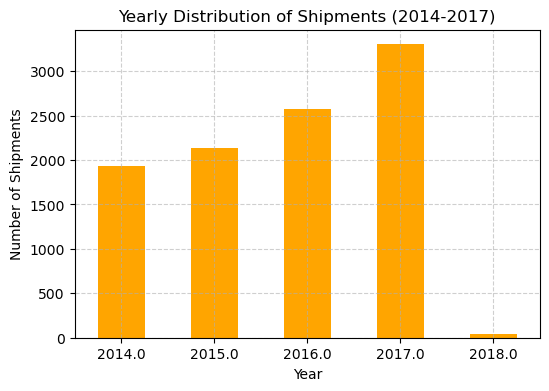

In [49]:
# Plotting the corrected yearly distribution of shipments
plt.figure(figsize=(6, 4))
shipments_per_year.plot(kind='bar', color='orange')
plt.title('Yearly Distribution of Shipments (2014-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


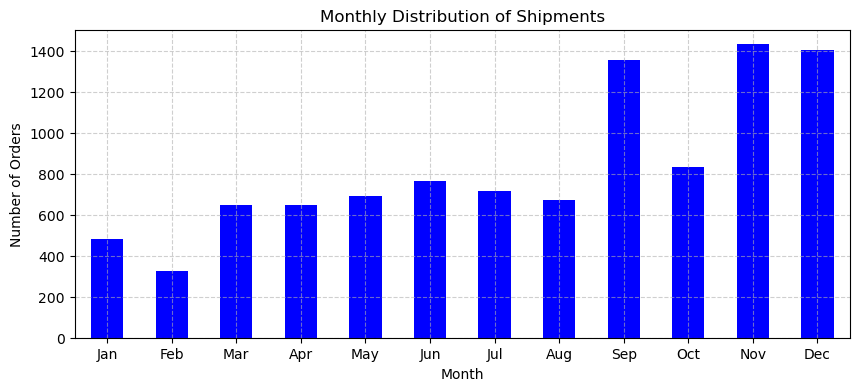

date_ordered
1      381
2      300
3      696
4      667
5      735
6      717
7      710
8      706
9     1383
10     819
11    1471
12    1408
Name: count, dtype: int64

In [50]:
# Extract month from 'date_shipped' and count the number of orders per month
orders_shipped_per_month = df['date_shipped'].dt.month.value_counts().sort_index()

# Plotting the yearly distribution of orders
plt.figure(figsize=(10, 4))
orders_shipped_per_month.plot(kind='bar', color='blue')
plt.title('Monthly Distribution of Shipments')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

orders_per_month

In [51]:
df[df['date_shipped'].isna()]

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
68,CA-2014-106376,2014-12-05,NaT,Standard Class,BS-11590,Corporate,Gilbert,Arizona,85234,West,TEC-PH-10002726,Technology,Phones,netTALK DUO VoIP Telephone Service,167.968,4,0.2,62.9880
126,US-2017-107272,2017-11-05,NaT,Standard Class,TS-21610,Consumer,Phoenix,Arizona,85023,West,OFF-BI-10003274,Office Supplies,Binders,"Avery Durable Slant Ring Binders, No Labels",2.388,2,0.7,-1.8308
127,US-2017-107272,2017-11-05,NaT,Standard Class,TS-21610,Consumer,Phoenix,Arizona,85023,West,OFF-ST-10002974,Office Supplies,Storage,"Trav-L-File Heavy-Duty Shuttle II, Black",243.992,7,0.2,30.4990
151,CA-2016-158834,2016-03-13,NaT,First Class,TW-21025,Home Office,Scottsdale,Arizona,85254,West,OFF-AP-10000326,Office Supplies,Appliances,Belkin 7 Outlet SurgeMaster Surge Protector wi...,157.920,5,0.2,17.7660
152,CA-2016-158834,2016-03-13,NaT,First Class,TW-21025,Home Office,Scottsdale,Arizona,85254,West,TEC-PH-10001254,Technology,Phones,Jabra BIZ 2300 Duo QD Duo Corded Headset,203.184,2,0.2,15.2388
372,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,Tucson,Arizona,85705,West,OFF-BI-10001982,Office Supplies,Binders,Wilson Jones Custom Binder Spines & Labels,8.160,5,0.7,-5.7120
373,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,Tucson,Arizona,85705,West,TEC-AC-10003911,Technology,Accessories,NETGEAR AC1750 Dual Band Gigabit Smart WiFi Ro...,1023.936,8,0.2,179.1888
374,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,Tucson,Arizona,85705,West,OFF-AR-10000658,Office Supplies,Art,Newell 324,9.240,1,0.2,0.9240
375,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,Tucson,Arizona,85705,West,TEC-AC-10002076,Technology,Accessories,Microsoft Natural Keyboard Elite,479.040,10,0.2,-29.9400
462,CA-2016-109869,2016-04-22,NaT,Standard Class,TN-21040,Home Office,Phoenix,Arizona,85023,West,FUR-FU-10000023,Furniture,Furnishings,Eldon Wave Desk Accessories,23.560,5,0.2,7.0680


In [52]:
# Calculate the processing time in days
df['processing_time'] = (df['date_shipped'] - df['date_ordered']).dt.days

# Display basic statistics and the first few entries of processing times
processing_time_stats = df['processing_time'].describe()
processing_time_samples = df['processing_time'].head()

processing_time_stats, processing_time_samples


(count    9977.000000
 mean        3.957001
 std         1.746820
 min         0.000000
 25%         3.000000
 50%         4.000000
 75%         5.000000
 max         7.000000
 Name: processing_time, dtype: float64,
 0    3.0
 1    3.0
 2    4.0
 3    7.0
 4    7.0
 Name: processing_time, dtype: float64)

The processing time, representing the number of days from when an order was placed to when it was shipped, has the following characteristics:

- Mean Processing Time: Approximately 3.96 days
- Standard Deviation: 1.75 days, indicating some variability but mostly consistent processing times
- Minimum Processing Time: 0 days (same-day shipping)
- Median Processing Time: 4 days
- Maximum Processing Time: 7 days

Most orders are processed within a week, with a median of 4 days. This suggests a relatively quick turnaround for shipping orders.

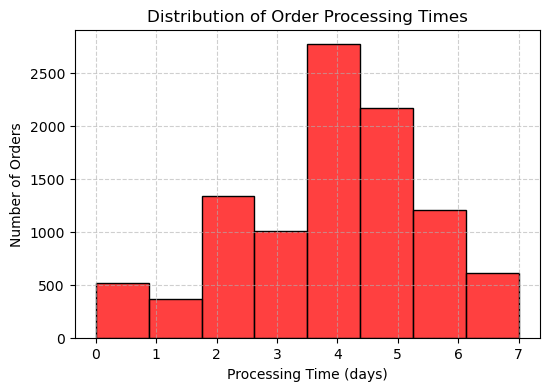

In [53]:
# Plotting the distribution of processing times
plt.figure(figsize=(6, 4))
sns.histplot(df['processing_time'], bins=8, kde=False, color='red')
plt.title('Distribution of Order Processing Times')
plt.xlabel('Processing Time (days)')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


The histogram of order processing times illustrates that the majority of orders are shipped within 3 to 5 days from the order date. There is a notable amount of orders processed in exactly 4 days, which is consistent with the median processing time. Additionally, there are some instances of same-day shipping, represented by the 0-day processing time, though these are less common.

This visualization helps us understand that the processing time for orders is relatively consistent, with most orders being shipped within a week, aligning with efficient logistics operations.

In [54]:
# df['date_ordered'] = pd.to_datetime(df['date_ordered'])
# df['date_shipped'] = pd.to_datetime(df['date_shipped'])

# # Calculate the median processing time
# median_processing_time = df['processing_time'].median()

# # Combined update of 'Date_Shipped' and recalculating 'Processing_Time'
# df['date_shipped'] = df['date_shipped'].fillna(
#     df['date_ordered'] + pd.DateOffset(days=median_processing_time)
# )
# df['processing_time'] = (df['date_shipped'] - df['date_ordered']).dt.days

# # Verify the combined updates by showing the basic statistics of 'Date_Shipped' and 'Processing_Time'
# final_date_shipped_check = df['date_shipped'].isnull().sum()
# final_processing_time_stats = df['processing_time'].describe()

# median_processing_time, final_date_shipped_check, final_processing_time_stats


### Ship Mode

In [55]:
# Count the frequency of each Ship Mode
ship_mode_counts = df['ship_mode'].value_counts()
ship_mode_counts

ship_mode
Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [56]:
# Display the percentages of each ship mode
ship_mode_percentages = df['ship_mode'].value_counts(normalize=True) * 100
ship_mode_percentages

ship_mode
Standard Class    59.711798
Second Class      19.463625
First Class       15.390774
Same Day           5.433804
Name: proportion, dtype: float64

The Ship Mode column has the following categories and distribution:

- Standard Class: 5,968 shipments (59.72%)
- Second Class: 1,945 shipments (19.46%)
- First Class: 1,538 shipments (15.39%)
- Same Day: 543 shipments (5.43%)

These statistics show that the majority of shipments are sent via Standard Class, which likely represents the default or most economical shipping option. First Class and Second Class are also significantly used, whereas Same Day shipping, the fastest and potentially most expensive option, is the least common.


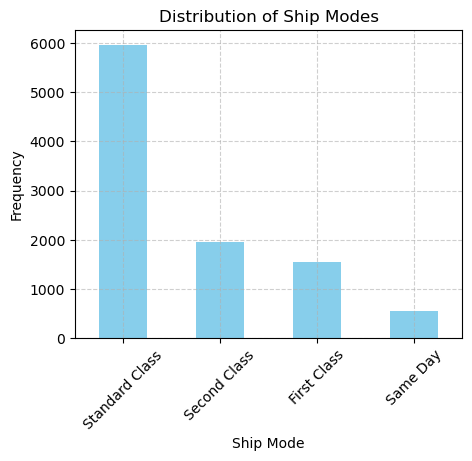

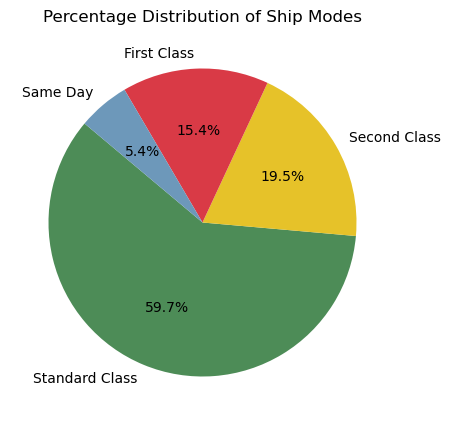

In [57]:
# Creating a bar chart for Ship Mode distribution
plt.figure(figsize=(5, 4))
ship_mode_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Creating a pie chart for Ship Mode distribution
plt.figure(figsize=(5, 5))
plt.pie(ship_mode_percentages, labels=ship_mode_percentages.index, autopct='%1.1f%%', startangle=140, colors=['#4D8C57', '#E6C229', '#D93A46', '#6D98BA'])
plt.title('Percentage Distribution of Ship Modes')
plt.show()


Here are the visual representations of the Ship Mode distribution within the dataset:

- **Bar Chart:** Highlights the frequency of each shipping mode, clearly showing that Standard Class is the most common, followed by Second Class, First Class, and Same Day.

- **Pie Chart:** Provides a percentage breakdown, giving a quick visual indication of the proportion each shipping mode occupies. Standard Class dominates, making up nearly 60% of all shipments.

These visualizations underscore the preference for Standard Class shipping, likely due to cost-efficiency, while faster shipping options like Same Day are less frequently used.

This analysis helps understand customer shipping preferences or operational logistics decisions.


To analyze the unique processing times for each Ship Mode, we can explore the range of processing times associated with each shipping option. This will provide insights into the variability and efficiency of each mode.

In [58]:
# Grouping the data by 'Ship Mode' and collecting unique processing times for each mode
unique_processing_times_per_ship_mode = df.dropna().groupby('ship_mode')['processing_time'].unique()

# Display the unique processing times for each shipping mode
unique_processing_times_per_ship_mode


ship_mode
First Class            [2.0, 1.0, 3.0, 4.0]
Same Day                         [0.0, 1.0]
Second Class      [3.0, 4.0, 2.0, 5.0, 1.0]
Standard Class    [7.0, 5.0, 4.0, 6.0, 3.0]
Name: processing_time, dtype: object

Here are the unique processing times for each shipping mode:

- **First Class:** Processing times include 1, 2, 3, and 4 days. This indicates a relatively quick processing time, aligning with the "First Class" service.

- **Same Day:** Processing times are 0, 1, and 4 days. The inclusion of a 0-day processing time highlights the immediacy of this shipping mode.

- **Second Class:** Processing times range from 1 to 5 days, showcasing a moderate speed that fits between First Class and Standard Class.

- **Standard Class:** Processing times span 3 to 7 days, indicating the longest durations, which is consistent with this being a less expensive and slower shipping option.

These results show a clear differentiation in service levels, with faster options (like First Class and Same Day) having shorter processing times, and more economical options (like Standard Class) taking longer. This information can be useful for understanding the operational efficiencies and customer service standards associated with each shipping mode.


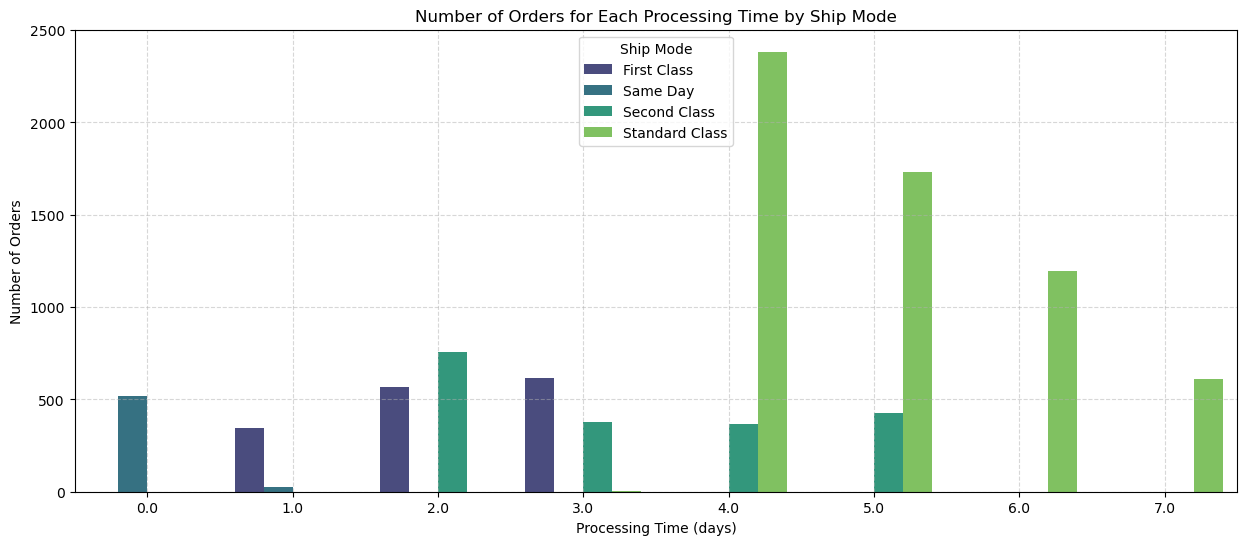

In [59]:
# Creating a DataFrame for visualization
processing_time_counts = df.dropna().groupby(['ship_mode', 'processing_time']).size().reset_index(name='Count')

# Plotting the data
plt.figure(figsize=(15, 6))
sns.barplot(x='processing_time', y='Count', hue='ship_mode', data=processing_time_counts, palette='viridis')
plt.title('Number of Orders for Each Processing Time by Ship Mode')
plt.xlabel('Processing Time (days)')
plt.ylabel('Number of Orders')
plt.legend(title='Ship Mode')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

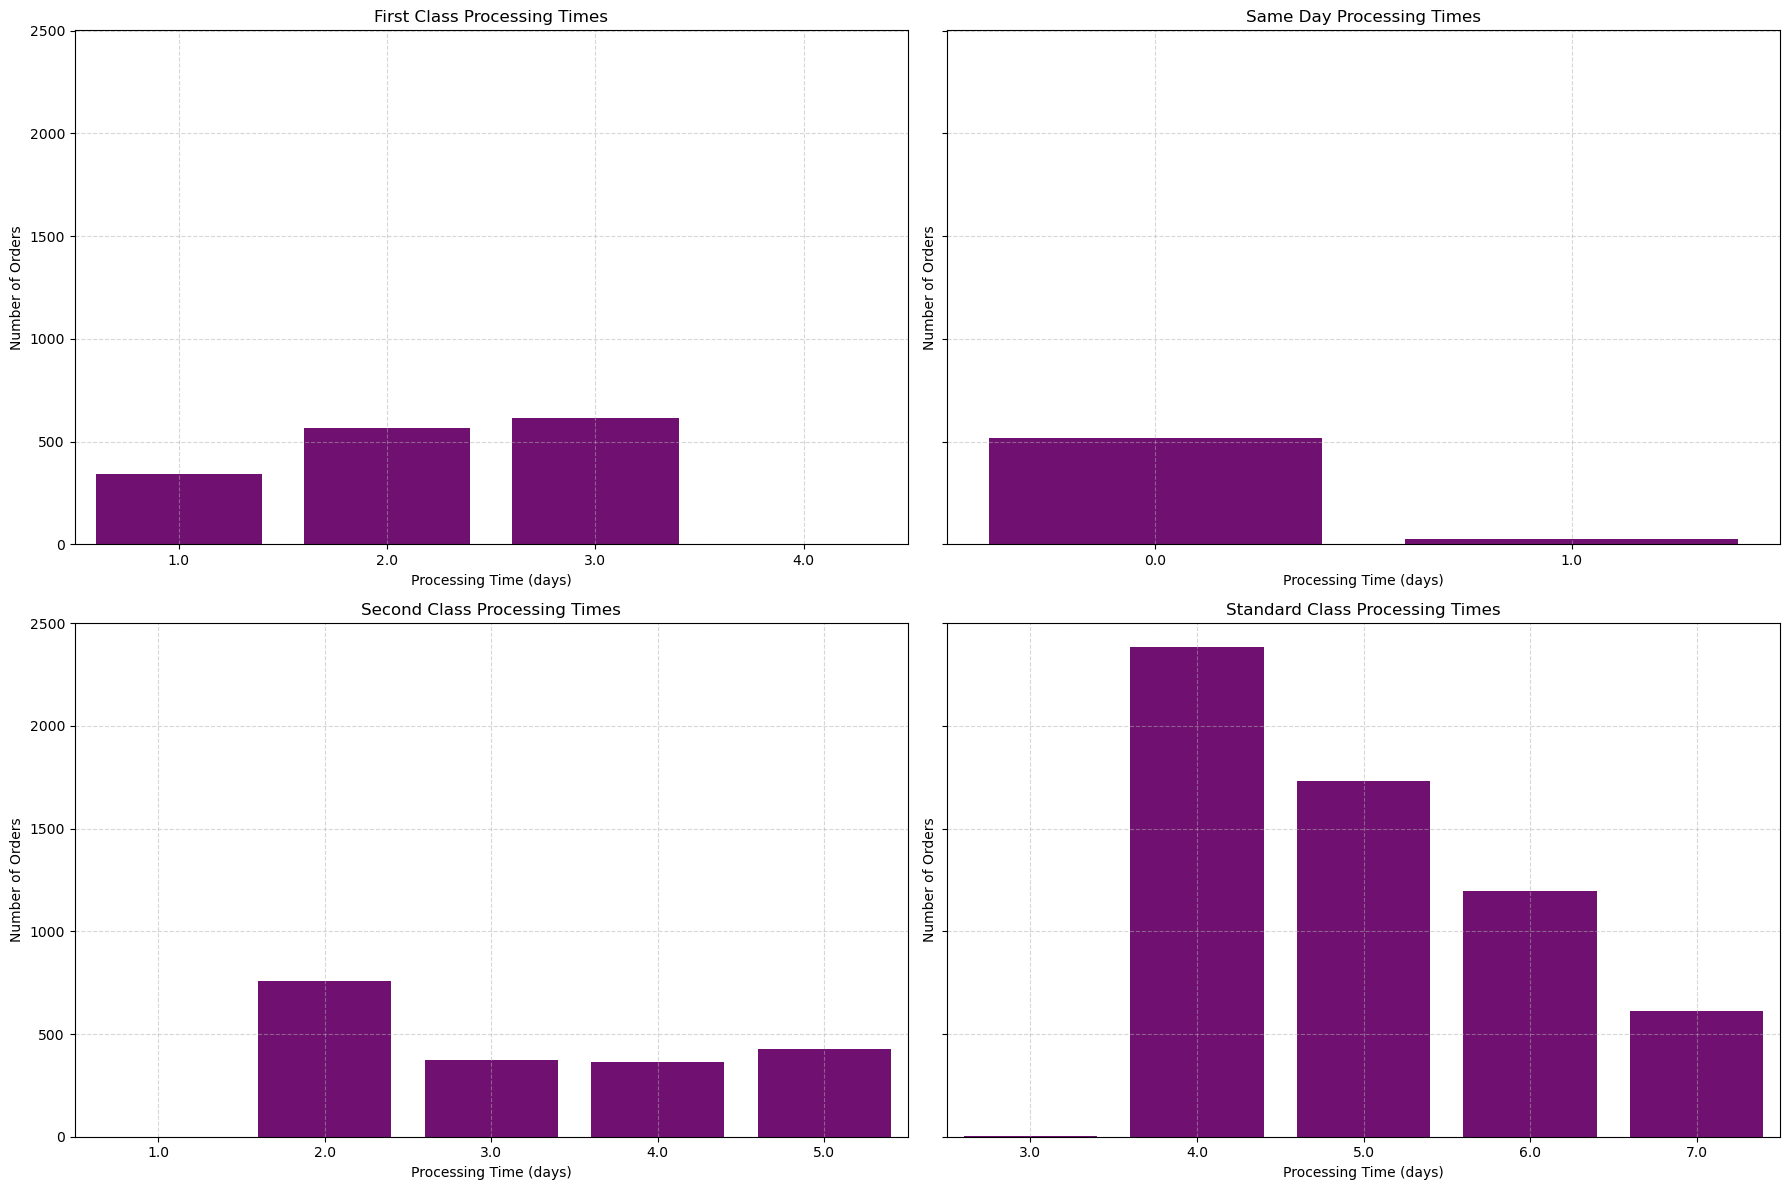

In [60]:
# Setting up the figure for multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharey=True)
axes = axes.flatten()  # Flatten to easily iterate

# Plotting individual bar charts for each Ship Mode
ship_modes = processing_time_counts['ship_mode'].unique()
for i, mode in enumerate(ship_modes):
    subset = processing_time_counts[processing_time_counts['ship_mode'] == mode]
    sns.barplot(x='processing_time', y='Count', data=subset, ax=axes[i], color='purple')
    axes[i].set_title(f'{mode} Processing Times')
    axes[i].set_xlabel('Processing Time (days)')
    axes[i].set_ylabel('Number of Orders')
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


In [61]:
# Calculate median processing times for each Ship Mode
median_processing_times_by_mode = df.groupby('ship_mode')['processing_time'].median()

# Display the median processing times for each Ship Mode
median_processing_times_by_mode


ship_mode
First Class       2.0
Same Day          0.0
Second Class      3.0
Standard Class    5.0
Name: processing_time, dtype: float64

Here are the median processing times specific to each Ship Mode:

- **First Class:** 2 days
- **Same Day:** 0 days
- **Second Class:** 3 days
- **Standard Class:** 5 days

These medians align more closely with the expected service levels of each shipping mode. Now, we will use these specific medians to update the missing `date_shipped` entries. This approach ensures that the estimated shipping dates are consistent with the shipping mode's typical processing time.


In [62]:
df['date_shipped'].isnull().sum()

16

In [63]:
# Identify rows with missing 'date_shipped' and update them using the median processing times specific to each 'ship_mode'
for mode, median_time in median_processing_times_by_mode.items():
    mode_mask = (df['ship_mode'] == mode) & (df['date_shipped'].isnull())
    df.loc[mode_mask, 'date_shipped'] = df.loc[mode_mask, 'date_ordered'] + pd.DateOffset(days=median_time)

# Recalculate 'processing_time' after updates
df['processing_time'] = (df['date_shipped'] - df['date_ordered']).dt.days

# Verify updates by checking for any remaining nulls in 'Date_Shipped'
remaining_nulls_after_update = df['date_shipped'].isnull().sum()
remaining_nulls_after_update


0

### Summary

To accurately fill missing `date_shipped` entries:

1. **Median Calculation:** We computed the median processing times separately for each shipping mode to reflect their specific service speeds.
2. **Date Estimation:** We filled the missing `date_shipped` values by adding the respective shipping mode’s median processing time to the `data_ordered` dates.
3. **Recalculation and Verification:** After updating, we recalculated the processing times and verified the integrity of the data to ensure all dates were correctly estimated according to each ship mode.

This targeted approach ensured the filled dates were realistic and consistent with each ship mode's typical processing duration.


### Customer ID

In [64]:
# Count the unique customer IDs
df['customer_id'].nunique()

793

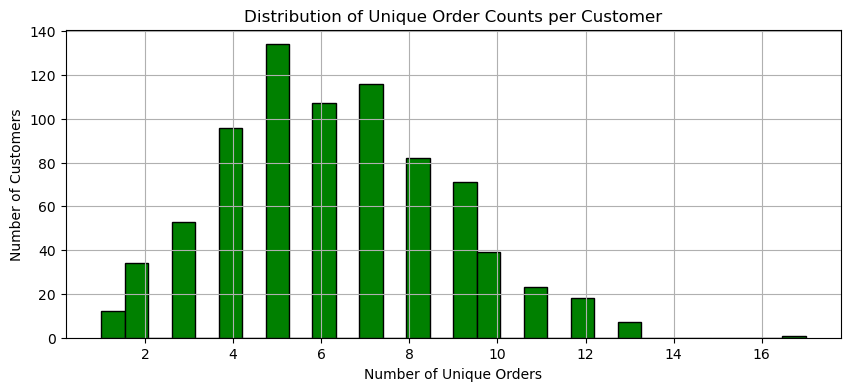

count    793.000000
mean       6.316520
std        2.550885
min        1.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       17.000000
Name: order_id, dtype: float64

In [65]:
# Group by 'Customer ID' and count unique 'OrderID'
unique_orders_per_customer = df.groupby('customer_id')['order_id'].nunique()

# Plotting the histogram of unique order counts per customer
plt.figure(figsize=(10, 4))
plt.hist(unique_orders_per_customer, bins=30, color='green', edgecolor='black')
plt.title('Distribution of Unique Order Counts per Customer')
plt.xlabel('Number of Unique Orders')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

unique_orders_per_customer.describe()


**Mean Unique Orders per Customer:** Approximately 6.32  
**Standard Deviation:** About 2.55, showing variability in how many distinct orders customers place.  
**Minimum Unique Orders:** At least one customer has made only one unique order.  
**Maximum Unique Orders:** The most active customer has made 17 unique orders.


The histogram now illustrates that most customers place between 5 and 8 unique orders. This suggests a generally consistent level of engagement among customers, with fewer outliers of higherorder counts.

### Customer Segment

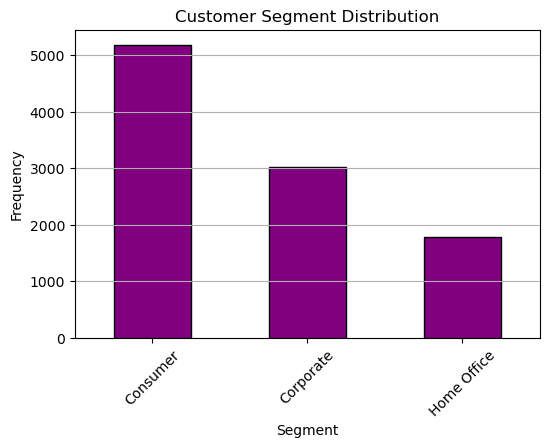

segment
Consumer       5191
Corporate      3020
Home Office    1782
Name: count, dtype: int64

In [66]:
# Count the frequency of each customer segment
segment_distribution = df['segment'].value_counts()

# Plotting the distribution of customer segments
plt.figure(figsize=(6, 4))
segment_distribution.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Customer Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

segment_distribution

The dataset contains three main customer segments:

- **Consumer:** 5,191 entries
- **Corporate:** 3,020 entries
- **Home Office:** 1,783 entries

Consumers form the largest segment, followed by Corporate and Home Office segments.


In [67]:
# Group data by 'Segment'
segment_group = df.groupby('segment')

# Calculate total and average orders per segment
total_orders_per_segment = segment_group['order_id'].nunique()
average_orders_per_customer_segment = df.groupby(['segment', 'customer_id'])['order_id'].nunique().groupby('segment').mean()

# Calculate total and average sales per segment
total_sales_per_segment = segment_group['sales'].sum()
average_sales_per_order_segment = total_sales_per_segment / total_orders_per_segment

# Compile the data for display
segment_analysis = pd.DataFrame({
    'Total Orders': total_orders_per_segment,
    'Average Orders per Customer': average_orders_per_customer_segment,
    'Total Sales': total_sales_per_segment,
    'Average Sales per Order': average_sales_per_order_segment
})

segment_analysis

,Total Orders,Average Orders per Customer,Total Sales,Average Sales per Order
segment,,,,
Consumer,2586,6.322738,1.154192e+06,446.323289
Corporate,1514,6.415254,6.961470e+05,459.806484
Home Office,909,6.141892,4.283681e+05,471.251987


From these results:

- The **Home Office** segment, while smaller, tends to spend more per order on average compared to the other segments.
- **Corporate** customers order slightly more frequently on average compared to other segments.


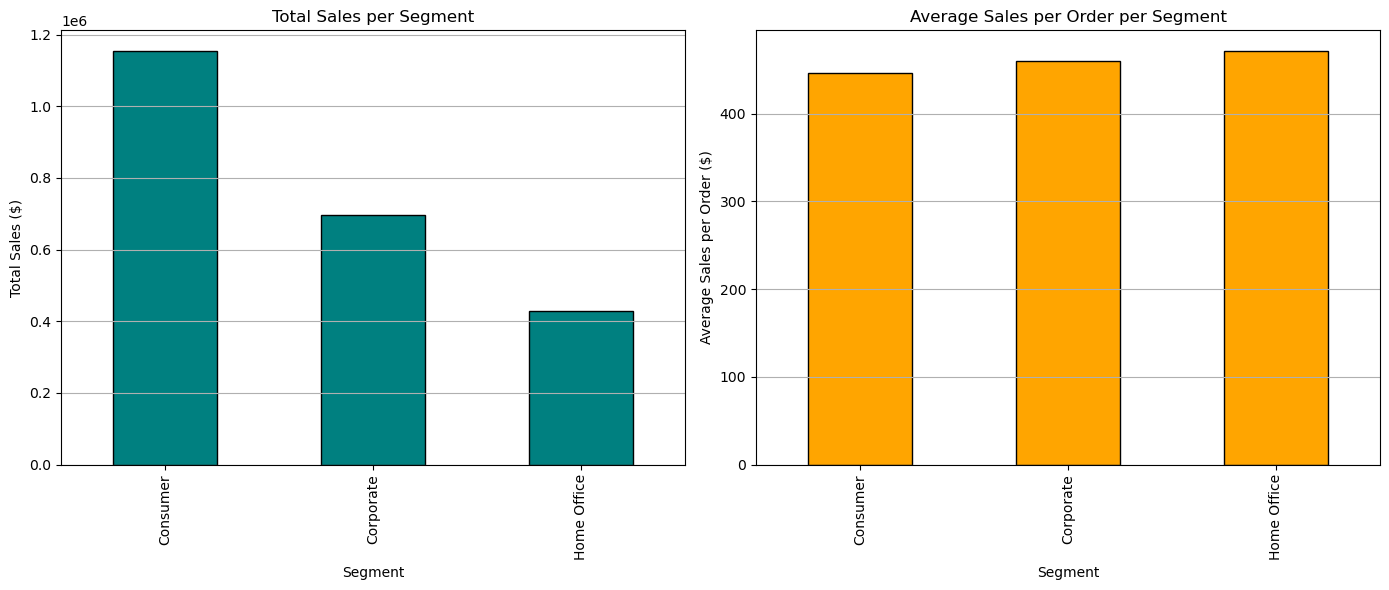

In [68]:
# Creating a bar plot for total sales per segment
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

segment_analysis['Total Sales'].plot(kind='bar', ax=ax[0], color='teal', edgecolor='black')
ax[0].set_title('Total Sales per Segment')
ax[0].set_xlabel('Segment')
ax[0].set_ylabel('Total Sales ($)')
ax[0].grid(axis='y')

# Creating a bar plot for average sales per order per segment
segment_analysis['Average Sales per Order'].plot(kind='bar', ax=ax[1], color='orange', edgecolor='black')
ax[1].set_title('Average Sales per Order per Segment')
ax[1].set_xlabel('Segment')
ax[1].set_ylabel('Average Sales per Order ($)')
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()

### Total Sales per Segment:

- The **Consumer** segment leads significantly in total sales, reflecting its larger size.
- **Corporate** and **Home Office** segments follow with lesser total sales, aligned with their smaller sizes.

### Average Sales per Order per Segment:

- Despite the Home Office segment having fewer orders and sales overall, it achieves the highest average sales per order, indicating that their orders are generally larger.
- Corporate also has higher average sales per order compared to the Consumer segment.

These insights suggest different strategies could be optimized for each segment, such as focusing on increasing the number of high-value orders for the Home Office segment or increasing the frequency of orders for the Corporate segment.


### City, State

In [69]:
df['city'].value_counts()

city
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64

In [70]:
df['state'].value_counts()

state
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     468
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

In [71]:
# Group by 'City' and 'State' to analyze frequency distribution
city_group = df.groupby('city')
state_group = df.groupby('state')

# Calculate the number of transactions and unique customers per city and state
city_transactions = city_group.size()
city_unique_customers = city_group['customer_id'].nunique()

state_transactions = state_group.size()
state_unique_customers = state_group['customer_id'].nunique()

# Display the results for cities (showing top 10 for brevity) and full results for states
city_summary = pd.DataFrame({
    'Transactions': city_transactions,
    'Unique Customers': city_unique_customers
}).sort_values(by='Transactions', ascending=False).head(10)

state_summary = pd.DataFrame({
    'Transactions': state_transactions,
    'Unique Customers': state_unique_customers
}).sort_values(by='Transactions', ascending=False).head(10)

city_summary, state_summary


(               Transactions  Unique Customers
 city                                         
 New York City           915               355
 Los Angeles             747               304
 Philadelphia            537               239
 San Francisco           510               232
 Seattle                 428               188
 Houston                 377               172
 Chicago                 314               155
 Columbus                221                97
 San Diego               170                86
 Springfield             163                66,
                 Transactions  Unique Customers
 state                                         
 California              2001               577
 New York                1128               415
 Texas                    985               370
 Pennsylvania             587               257
 Washington               506               224
 Illinois                 492               237
 Ohio                     468               202
 Fl

### Frequency Distribution Analysis

### Top 10 Cities by Transactions:

1. New York City: 915 transactions, 355 unique customers
2. Los Angeles: 747 transactions, 304 unique customers
3. Philadelphia: 537 transactions, 239 unique customers
4. San Francisco: 510 transactions, 232 unique customers
5. Seattle: 428 transactions, 188 unique customers
6. Houston: 377 transactions, 172 unique customers
7. Chicago: 314 transactions, 155 unique customers
8. Columbus: 221 transactions, 97 unique customers
9. San Diego: 170 transactions, 86 unique customers
10. Springfield: 163 transactions, 66 unique customers

### States with Most Transactions:

- California: 2,001 transactions, 577 unique customers
- New York: 1,128 transactions, 415 unique customers
- Texas: 985 transactions, 370 unique customers
- Pennsylvania: 587 transactions, 257 unique customers

These cities and states show significant commercial activity, with coastal and large metropolitan areas like New York City, Los Angeles, and San Francisco showing the highest engagement.


In [72]:
# Calculate total sales, average sales per transaction, and order count per city and state
city_sales = city_group['sales'].sum()
city_avg_sales = city_group['sales'].mean()

state_sales = state_group['sales'].sum()
state_avg_sales = state_group['sales'].mean()

# Compile sales data into summaries for cities and states
city_sales_summary = pd.DataFrame({
    'Total Sales': city_sales,
    'Average Sales per Transaction': city_avg_sales
}).sort_values(by='Total Sales', ascending=False).head(10)

state_sales_summary = pd.DataFrame({
    'Total Sales': state_sales,
    'Average Sales per Transaction': state_avg_sales
}).sort_values(by='Total Sales', ascending=False).head(10)

city_sales_summary, state_sales_summary


(               Total Sales  Average Sales per Transaction
 city                                                     
 New York City  256368.1610                     280.183783
 Los Angeles    175851.3410                     235.410095
 Seattle        119540.7420                     279.300799
 San Francisco  112669.0920                     220.919788
 Philadelphia   109077.0130                     203.122929
 Houston         64504.7604                     171.100160
 Chicago         48539.5410                     154.584525
 San Diego       47521.0290                     279.535465
 Jacksonville    44713.1830                     357.705464
 Springfield     43054.3420                     264.137067,
               Total Sales  Average Sales per Transaction
 state                                                   
 California    457687.6315                     228.729451
 New York      310876.2710                     275.599531
 Texas         170188.0458                     172.779742
 

## Sales Analysis for Cities and States

### Top 10 Cities by Total Sales:

1. New York City: $256,368, Avg. Sale/Transaction: $280.18
2. Los Angeles: $175,851, Avg. Sale/Transaction: $235.41
3. Seattle: $119,541, Avg. Sale/Transaction: $279.30
4. San Francisco: $112,669, Avg. Sale/Transaction: $220.92
5. Philadelphia: $109,077, Avg. Sale/Transaction: $203.12
6. Houston: $64,505, Avg. Sale/Transaction: $171.10
7. Chicago: $48,540, Avg. Sale/Transaction: $154.58
8. San Diego: $47,521, Avg. Sale/Transaction: $279.54
9. Jacksonville: $44,713, Avg. Sale/Transaction: $357.71
10. Springfield: $43,054, Avg. Sale/Transaction: $264.14

### States with Highest Total Sales:

- California: $457,688, Avg. Sale/Transaction: $228.73
- New York: $310,876, Avg. Sale/Transaction: $275.60
- Texas: $170,188, Avg. Sale/Transaction: $172.78
- Washington: $138,641, Avg. Sale/Transaction: $274.00

**Observations:**
New York City and Los Angeles, as major urban centers, not only lead in the number of transactions but also in total sales, reflecting their significant role in the economic activity captured in this dataset. California and New York, as states, hold substantial shares of total sales, correlating with their large populations and high numbers of transactions.


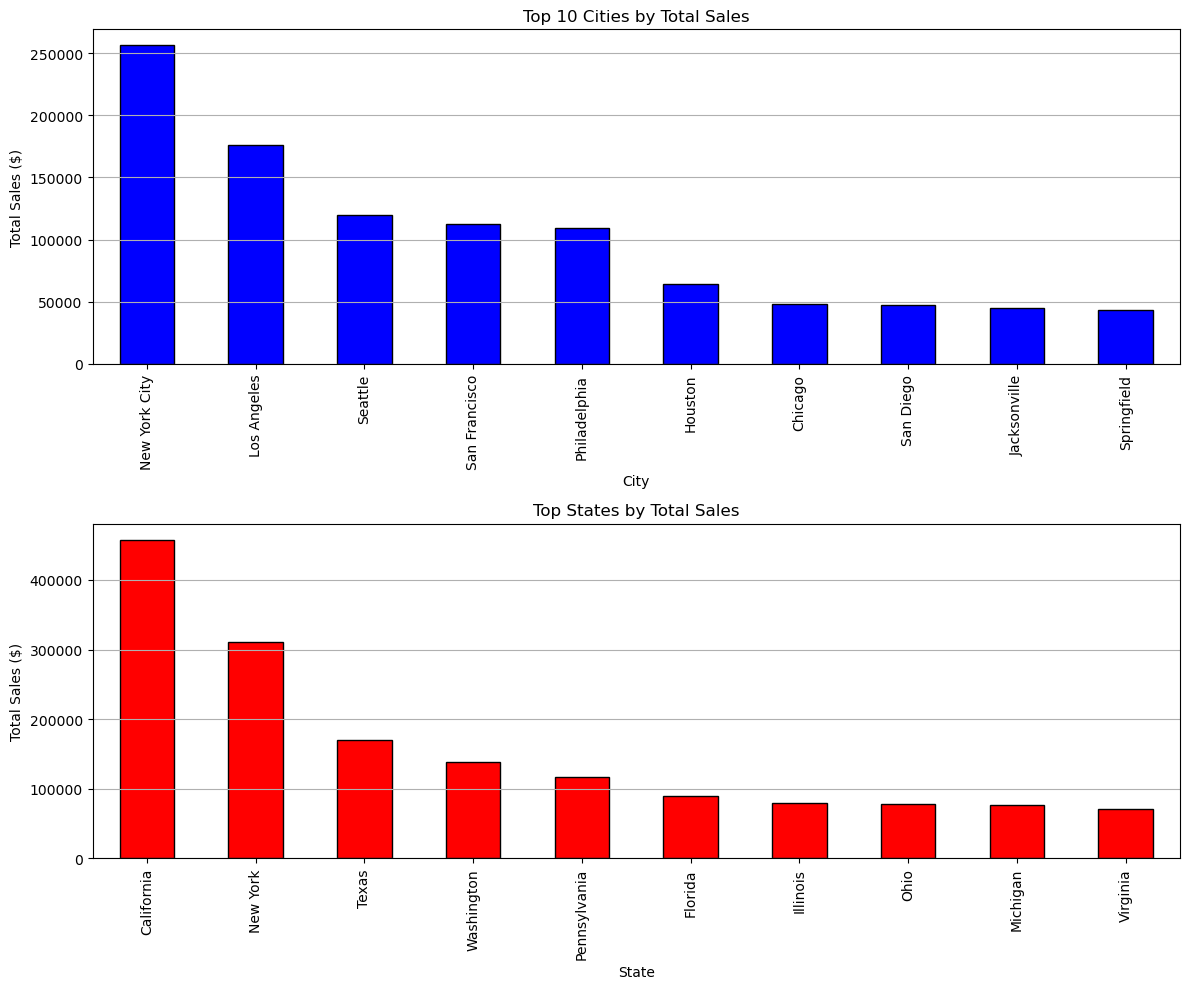

In [73]:
# Visualizing the top 10 cities and states by total sales
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Top 10 Cities by Total Sales
city_sales_summary['Total Sales'].plot(kind='bar', ax=ax[0], color='blue', edgecolor='black')
ax[0].set_title('Top 10 Cities by Total Sales')
ax[0].set_xlabel('City')
ax[0].set_ylabel('Total Sales ($)')
ax[0].grid(axis='y')

# Top States by Total Sales
state_sales_summary['Total Sales'].head(10).plot(kind='bar', ax=ax[1], color='red', edgecolor='black')
ax[1].set_title('Top States by Total Sales')
ax[1].set_xlabel('State')
ax[1].set_ylabel('Total Sales ($)')
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()


### Region

In [74]:
df['region'].value_counts()

region
West       3203
East       2847
Central    2323
South      1620
Name: count, dtype: int64

In [75]:
# Group by 'region' to analyze frequency distribution and sales
region_group = df.groupby('region')

# Calculate the number of transactions and unique customers per region
region_transactions = region_group.size()
region_unique_customers = region_group['customer_id'].nunique()

# Calculate total sales, average sales per transaction, and max/min sales per region
region_total_sales = region_group['sales'].sum()
region_avg_sales = region_group['sales'].mean()
region_max_sales = region_group['sales'].max()
region_min_sales = region_group['sales'].min()

# Compile the data for display
region_summary = pd.DataFrame({
    'Transactions': region_transactions,
    'Unique Customers': region_unique_customers,
    'Total Sales': region_total_sales,
    'Average Sales per Transaction': region_avg_sales,
    'Max Sale': region_max_sales,
    'Min Sale': region_min_sales
})

region_summary

,Transactions,Unique Customers,Total Sales,Average Sales per Transaction,Max Sale,Min Sale
region,,,,,,
Central,2323,629,501239.8908,215.772661,17499.950,0.444
East,2847,674,678499.8680,238.320993,11199.968,0.852
South,1620,512,373509.5150,238.207599,22638.480,1.167
West,3203,686,725457.8245,226.493233,13999.960,0.990


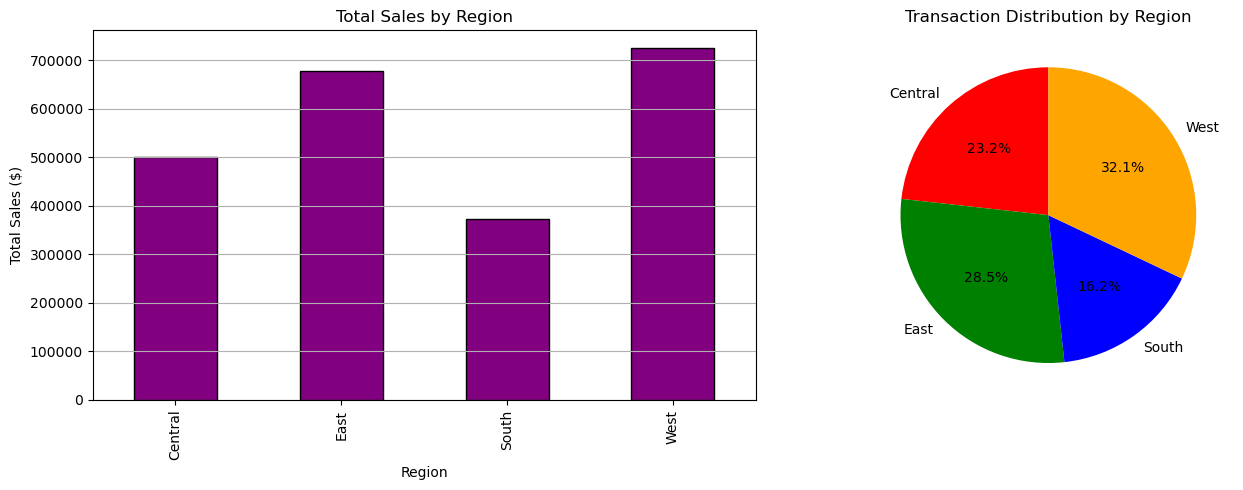

In [76]:
# Visualizing the regional data with bar and pie charts
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart for total sales by region
region_summary['Total Sales'].plot(kind='bar', ax=ax[0], color='purple', edgecolor='black')
ax[0].set_title('Total Sales by Region')
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Total Sales ($)')
ax[0].grid(axis='y')

# Pie chart for distribution of transactions by region
region_summary['Transactions'].plot(kind='pie', ax=ax[1], autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'orange'])
ax[1].set_ylabel('')  # Remove the y-label as it's clear from context
ax[1].set_title('Transaction Distribution by Region')

plt.tight_layout()
plt.show()


**Total Sales by Region:** The West region leads significantly in total sales, followed by the East, Central, and South regions. This highlights the West as a major economic contributor in terms of sales volume.

**Transaction Distribution by Region:** The West region also accounts for the largest percentage of transactions (31.8%), underscoring its active market. The East follows closely, contributing 28.3% of transactions, while the Central and South regions show lower activity levels.


### Product ID

In [77]:
df['product_id'].value_counts()

product_id
OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
TEC-AC-10002049    15
FUR-CH-10001146    15
                   ..
TEC-PH-10003535     1
TEC-MA-10002937     1
OFF-AR-10004974     1
TEC-AC-10004814     1
OFF-ST-10001627     1
Name: count, Length: 1862, dtype: int64

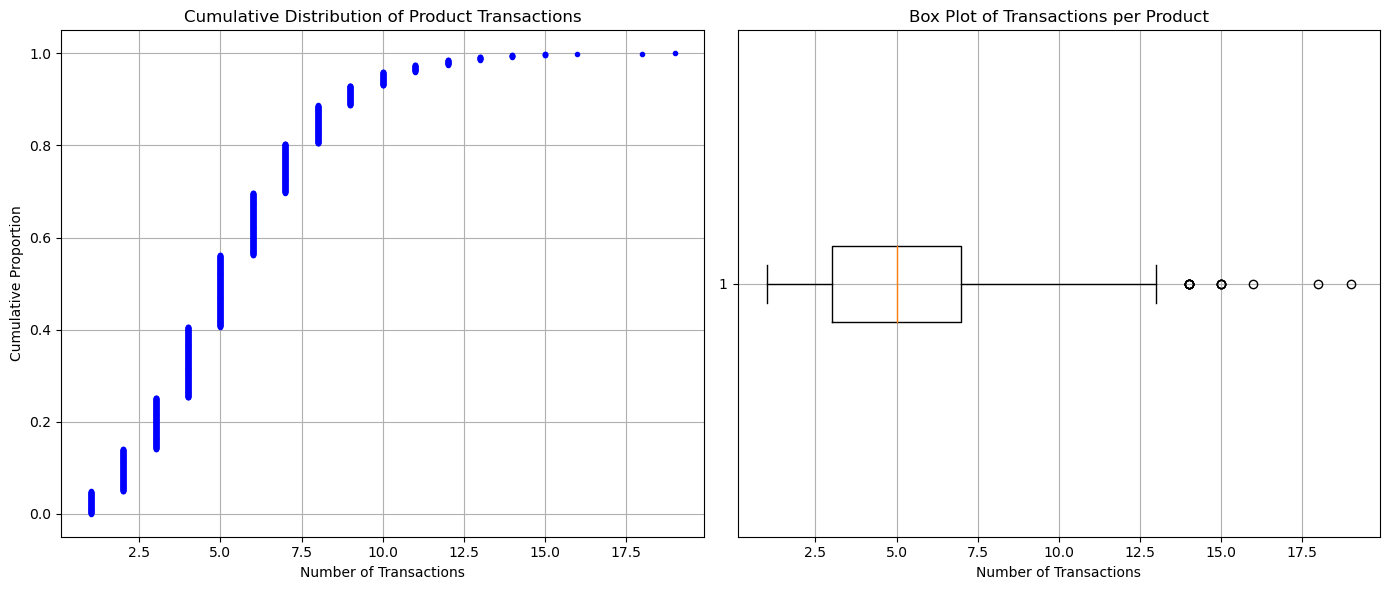

In [78]:
# Get the value counts as a series
product_transaction_counts = df['product_id'].value_counts()

# Preparing data for cumulative distribution plot
cumulative_data = np.sort(product_transaction_counts)
cumulative_values = np.arange(1, len(cumulative_data) + 1) / len(cumulative_data)

# Create the plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Cumulative Distribution Plot
ax[0].plot(cumulative_data, cumulative_values, marker='.', linestyle='none', color='blue')
ax[0].set_title('Cumulative Distribution of Product Transactions')
ax[0].set_xlabel('Number of Transactions')
ax[0].set_ylabel('Cumulative Proportion')
ax[0].grid(True)

# Box Plot
ax[1].boxplot(product_transaction_counts, vert=False)
ax[1].set_title('Box Plot of Transactions per Product')
ax[1].set_xlabel('Number of Transactions')
ax[1].grid(True)

plt.tight_layout()
plt.show()

**Cumulative Distribution Plot:**

- This plot shows that a large proportion of products have very few transactions, with a steep rise in the cumulative curve at the lower end of the transaction range. This indicates that most products are infrequently purchased.
- The curve flattens towards the right, showing that very few products have high transaction counts.

**Box Plot:**

- The box plot highlights the central tendency and variability in the distribution of transactions per product. The median is quite low, suggesting that the typical product has only a few transactions.
- There are several outliers, indicating some products with significantly higher transaction counts than most.


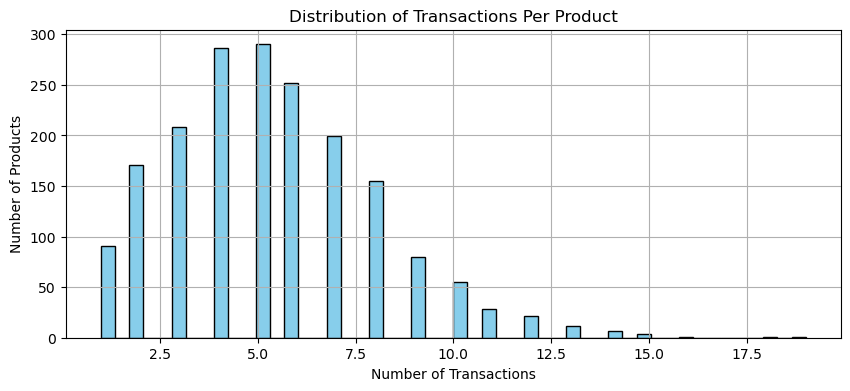

In [79]:
import matplotlib.pyplot as plt

# Create a histogram for the distribution of transactions per product
plt.figure(figsize=(10, 4))
plt.hist(df['product_id'].value_counts(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Transactions Per Product')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Products')
plt.grid(True)
plt.show()


**The histogram illustrates the distribution of transactions per product across the dataset. Here's what we can observe:**

- **High Frequency at Lower Transaction Counts:** A large number of products have only a few transactions, as shown by the peak at the lower end of the histogram. This suggests that many products are purchased infrequently.

- **Few High Frequency Products:** There are only a few products with a high number of transactions, indicating a small group of products that are very popular and likely contribute significantly to overall sales.

This distribution confirms the "long tail" characteristic of the product inventory, where a large number of products have low sales volumes, and a small number of products have high sales volumes. Such insights can be crucial for strategic decisions on product stocking, promotions, and discontinuations.

### Category

In [80]:
df['category'].value_counts()

category
Office Supplies    6026
Furniture          2120
Technology         1847
Name: count, dtype: int64

In [81]:
# Group by 'category' to analyze metrics related to categories
category_group = df.groupby('category')

# Calculate the number of transactions and unique products per category
category_transactions = category_group.size()
category_unique_products = category_group['product_id'].nunique()

# Calculate total and average sales per category
category_total_sales = category_group['sales'].sum()
category_avg_sales = category_group['sales'].mean()

# Calculate total and average profit per category
category_total_profit = category_group['profit'].sum()
category_avg_profit = category_group['profit'].mean()

# Compile the data into a summary DataFrame
category_summary = pd.DataFrame({
    'Transactions': category_transactions,
    'Unique Products': category_unique_products,
    'Total Sales': category_total_sales,
    'Average Sales per Transaction': category_avg_sales,
    'Total Profit': category_total_profit,
    'Average Profit per Transaction': category_avg_profit
})

category_summary

,Transactions,Unique Products,Total Sales,Average Sales per Transaction,Total Profit,Average Profit per Transaction
category,,,,,,
Furniture,2120,375,735385.9433,348.689399,18463.3316,8.709119
Office Supplies,6026,1083,715398.2820,119.292693,122487.2368,20.333207
Technology,1847,404,827922.8730,451.184127,145404.5493,78.767361


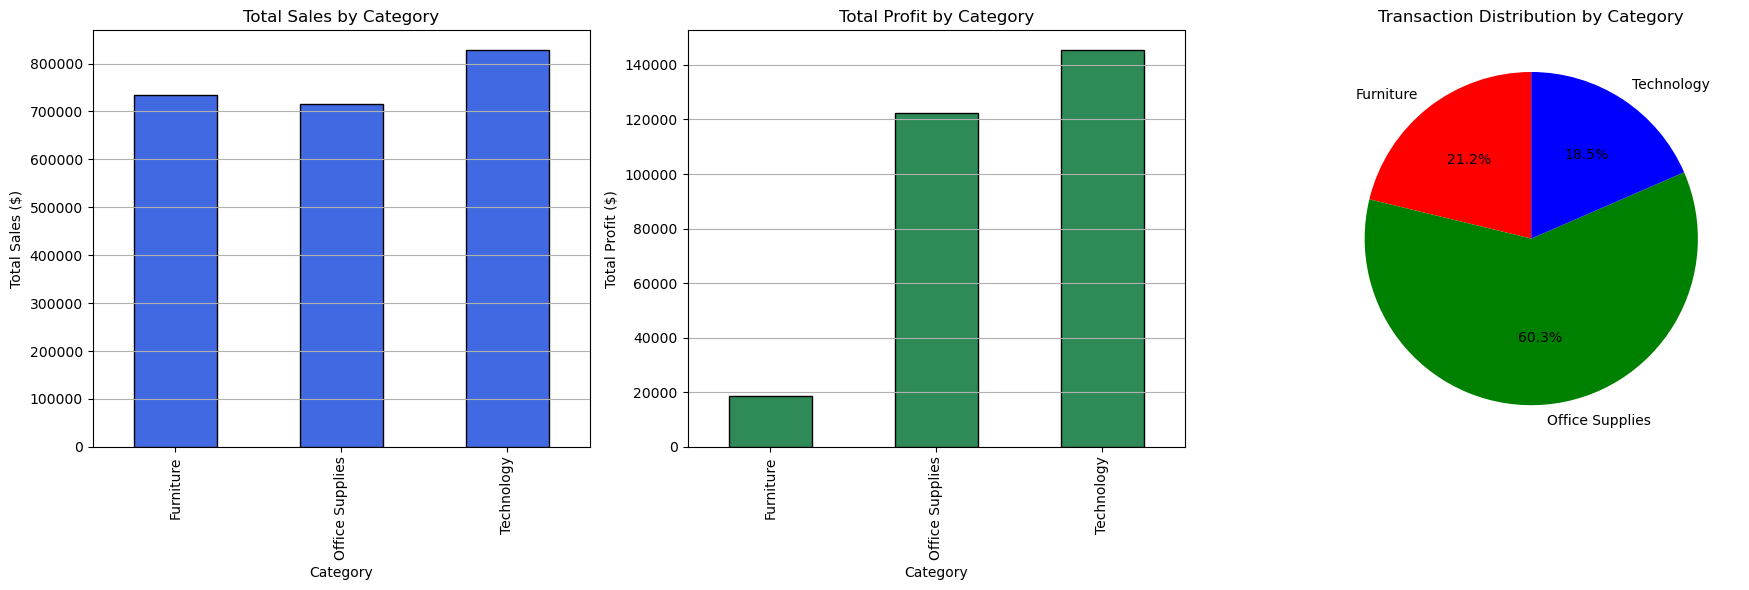

In [82]:
# Creating visualizations for category data
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Bar chart for total sales by category
category_summary['Total Sales'].plot(kind='bar', ax=ax[0], color='royalblue', edgecolor='black')
ax[0].set_title('Total Sales by Category')
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Total Sales ($)')
ax[0].grid(axis='y')

# Bar chart for total profit by category
category_summary['Total Profit'].plot(kind='bar', ax=ax[1], color='seagreen', edgecolor='black')
ax[1].set_title('Total Profit by Category')
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Total Profit ($)')
ax[1].grid(axis='y')

# Pie chart for transaction distribution by category
category_summary['Transactions'].plot(kind='pie', ax=ax[2], autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
ax[2].set_ylabel('')  # Remove the y-label as it's clear from context
ax[2].set_title('Transaction Distribution by Category')

plt.tight_layout()
plt.show()


In [83]:
df['subcategory'].value_counts()

subcategory
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          616
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

In [84]:
# Correcting the group by 'subcategory' to analyze metrics related to sub-categories
sub_category_group = df.groupby('subcategory')

# Calculate the number of transactions and unique products per sub-category
sub_category_transactions = sub_category_group.size()
sub_category_unique_products = sub_category_group['product_id'].nunique()

# Calculate total and average sales per sub-category
sub_category_total_sales = sub_category_group['sales'].sum()
sub_category_avg_sales = sub_category_group['sales'].mean()

# Calculate total and average profit per sub-category
sub_category_total_profit = sub_category_group['profit'].sum()
sub_category_avg_profit = sub_category_group['profit'].mean()

# Compile the data into a summary DataFrame
sub_category_summary = pd.DataFrame({
    'Transactions': sub_category_transactions,
    'Unique Products': sub_category_unique_products,
    'Total Sales': sub_category_total_sales,
    'Average Sales per Transaction': sub_category_avg_sales,
    'Total Profit': sub_category_total_profit,
    'Average Profit per Transaction': sub_category_avg_profit
}).sort_values(by='Total Sales', ascending=False)

sub_category_summary

,Transactions,Unique Products,Total Sales,Average Sales per Transaction,Total Profit,Average Profit per Transaction
subcategory,,,,,,
Phones,889,184,327300.7740,370.669053,44465.3318,50.073572
Chairs,616,87,324252.1910,530.690984,26602.2251,43.185430
Storage,846,131,222667.5580,263.824121,21278.8264,25.152277
Tables,319,57,204589.0720,647.433772,-17725.4811,-55.565771
Binders,1523,210,202988.8130,133.986015,30225.0897,19.858797
Machines,115,63,186198.6310,1633.321325,3384.7569,29.432669
Accessories,775,144,165795.4080,215.039440,41936.6357,54.111788
Copiers,68,13,148628.0600,2218.329254,55617.8249,817.909190
Bookcases,228,49,114879.9963,503.859633,-3472.5560,-15.230509


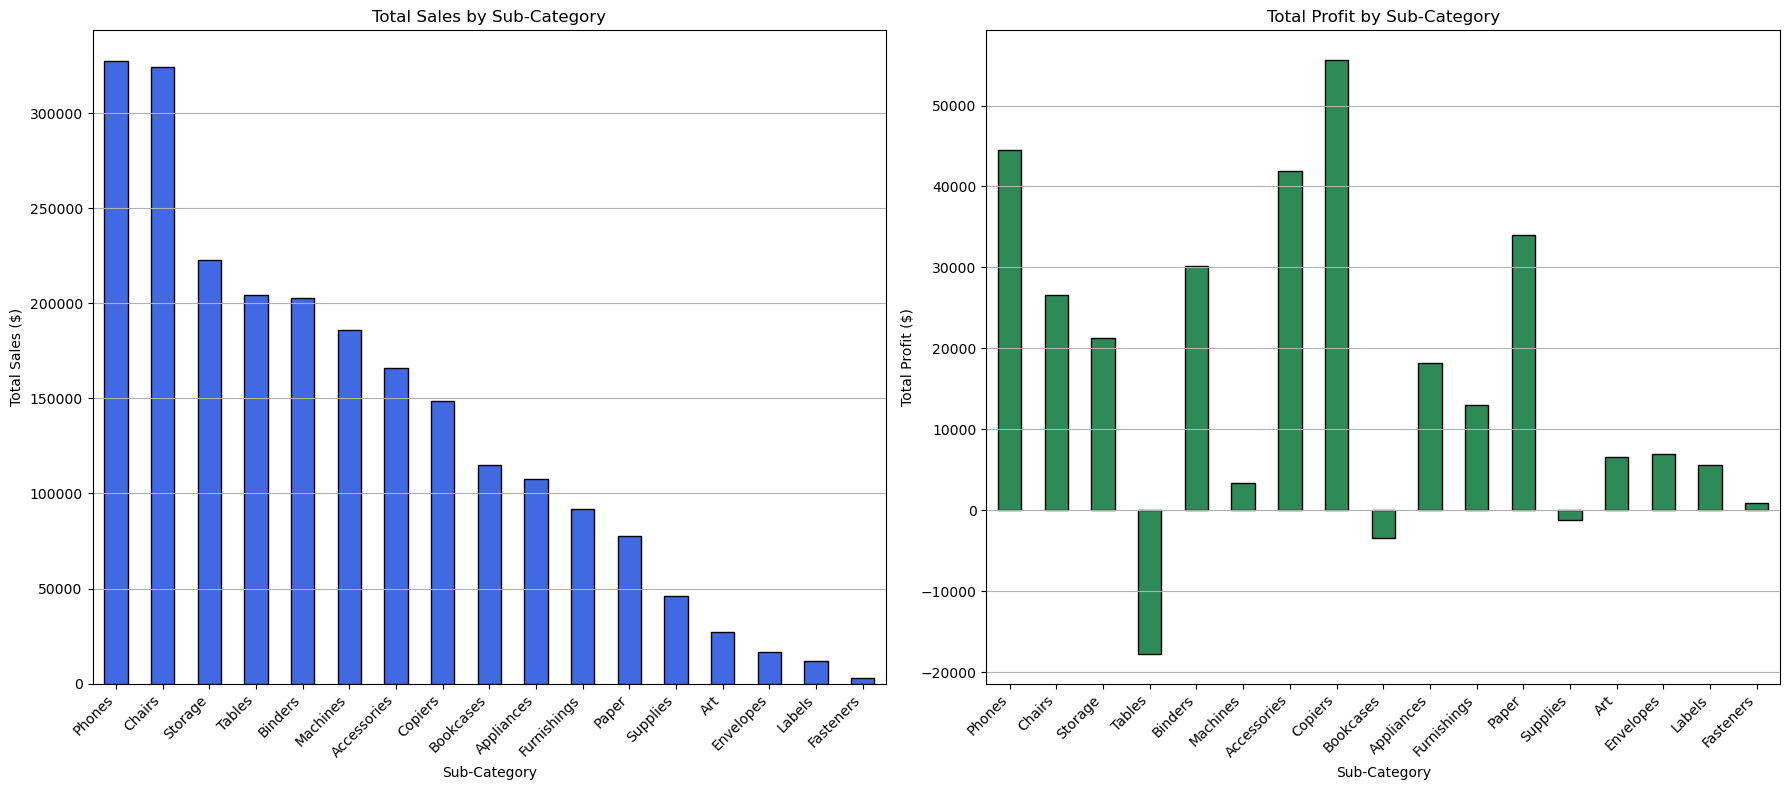

In [85]:
# Creating visualizations for sub-category data
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Bar chart for total sales by sub-category
sub_category_summary['Total Sales'].plot(kind='bar', ax=ax[0], color='royalblue', edgecolor='black')
ax[0].set_title('Total Sales by Sub-Category')
ax[0].set_xlabel('Sub-Category')
ax[0].set_ylabel('Total Sales ($)')
ax[0].set_xticklabels(sub_category_summary.index, rotation=45, ha='right')
ax[0].grid(axis='y')

# Bar chart for total profit by sub-category
sub_category_summary['Total Profit'].plot(kind='bar', ax=ax[1], color='seagreen', edgecolor='black')
ax[1].set_title('Total Profit by Sub-Category')
ax[1].set_xlabel('Sub-Category')
ax[1].set_ylabel('Total Profit ($)')
ax[1].set_xticklabels(sub_category_summary.index, rotation=45, ha='right')
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()


### Quantity

In [86]:
# Basic statistics for the 'Quantity' column
quantity_stats = df['quantity'].describe()

# Frequency distribution of different quantities purchased
quantity_distribution = df['quantity'].value_counts().sort_index()

quantity_stats, quantity_distribution


(count    9993.000000
 mean        3.774942
 std         2.250186
 min        -9.000000
 25%         2.000000
 50%         3.000000
 75%         5.000000
 max        14.000000
 Name: quantity, dtype: float64,
 quantity
 -9        2
 -7        1
 -6        1
 -5        3
 -4        2
 -3        5
 -2        1
 -1        3
  1      896
  2     2400
  3     2404
  4     1189
  5     1227
  6      571
  7      605
  8      257
  9      256
  10      57
  11      34
  12      23
  13      27
  14      29
 Name: count, dtype: int64)

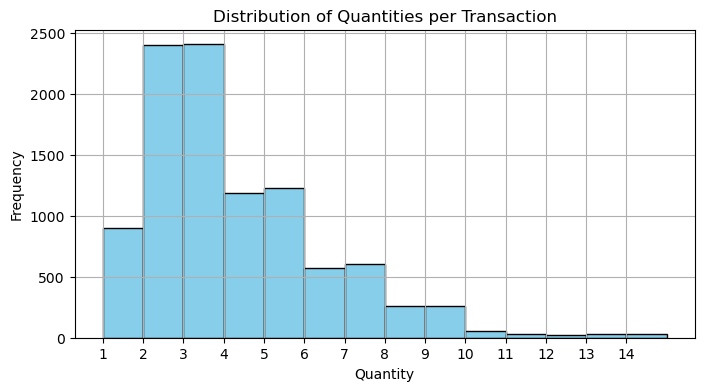

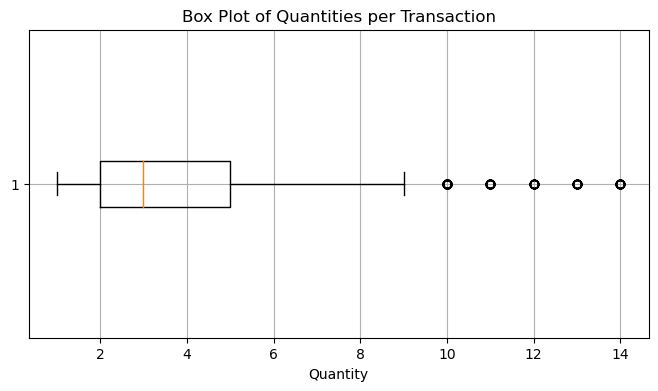

In [87]:
import matplotlib.pyplot as plt

# Filter out negative quantities for visualization purposes
filtered_quantities = df[df['quantity'] > 0]['quantity']

# Creating the histogram of quantities
plt.figure(figsize=(8, 4))
plt.hist(filtered_quantities, bins=range(1, filtered_quantities.max()+2), color='skyblue', edgecolor='black')
plt.title('Distribution of Quantities per Transaction')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.xticks(range(1, filtered_quantities.max()+1))
plt.grid(True)
plt.show()

# Creating the box plot to visualize spread and outliers
plt.figure(figsize=(8, 4))
plt.boxplot(filtered_quantities, vert=False)
plt.title('Box Plot of Quantities per Transaction')
plt.xlabel('Quantity')
plt.grid(True)
plt.show()


In [88]:
# Extract records with negative quantities
negative_quantities = df[df['quantity'] < 0]

# Basic statistics for these records
negative_quantities.describe()



,date_ordered,date_shipped,postal_code,sales,quantity,discount,profit,processing_time
count,18,18,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2016-02-06 10:40:00,2016-02-10 08:00:00,51383.666667,252.924500,-4.111111,0.236111,-13.804567,3.888889
min,2014-04-06 00:00:00,2014-04-08 00:00:00,2920.000000,51.588000,-9.000000,0.000000,-185.716800,0.000000
25%,2014-10-04 18:00:00,2014-10-05 18:00:00,23666.000000,154.764000,-5.000000,0.000000,-43.849800,3.250000
50%,2016-02-18 00:00:00,2016-02-22 00:00:00,45815.000000,227.847000,-3.500000,0.300000,-14.616600,4.000000
75%,2017-03-06 06:00:00,2017-03-11 18:00:00,76354.500000,340.695750,-3.000000,0.400000,39.120900,5.000000
max,2017-11-26 00:00:00,2017-12-01 00:00:00,98115.000000,515.880000,-1.000000,0.500000,113.493600,7.000000
std,NaN,NaN,31819.760194,136.188006,2.446820,0.205659,82.376512,1.778595


In [89]:
negative_quantities

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit,processing_time
1129,CA-2016-112102,2016-04-12,2016-04-16,Standard Class,BD-11605,Consumer,Springfield,Virginia,22153,South,FUR-TA-10004086,Furniture,Tables,KI Adjustable-Height Table,343.920,-4,0.00,75.6624,4
1405,US-2014-118486,2014-04-06,2014-04-08,First Class,SD-20485,Home Office,Philadelphia,Pennsylvania,19143,East,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,154.764,-3,0.40,-36.1116,2
1558,CA-2015-112116,2015-03-16,2015-03-18,Second Class,JE-15475,Consumer,Seattle,Washington,98103,West,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,171.960,-2,0.00,44.7096,2
1699,CA-2014-135657,2014-06-03,2014-06-07,Second Class,SC-20725,Consumer,Seattle,Washington,98115,West,FUR-TA-10004086,Furniture,Tables,KI Adjustable-Height Table,515.880,-6,0.00,113.4936,4
2277,CA-2014-104283,2014-06-27,2014-07-01,Standard Class,LM-17065,Consumer,Southaven,Mississippi,38671,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.980,-1,0.00,22.3548,4
2493,CA-2016-146206,2016-09-10,2016-09-14,Second Class,KT-16480,Consumer,Houston,Texas,77095,Central,FUR-TA-10004086,Furniture,Tables,KI Adjustable-Height Table,300.930,-5,0.30,-34.3920,4
3389,CA-2017-148404,2017-10-07,2017-10-11,Standard Class,Dp-13240,Home Office,Charlotte,North Carolina,28205,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,154.764,-3,0.40,-36.1116,4
5094,US-2014-140452,2014-12-06,2014-12-10,Standard Class,BK-11260,Consumer,Chicago,Illinois,60610,Central,FUR-TA-10004086,Furniture,Tables,KI Adjustable-Height Table,214.950,-5,0.50,-120.3720,4
5124,CA-2014-160766,2014-09-14,2014-09-14,Same Day,DM-13015,Consumer,New York City,New York,10009,East,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,464.292,-9,0.40,-108.3348,0
5293,CA-2015-111073,2015-12-26,2015-12-30,Standard Class,MC-18100,Consumer,Medina,Ohio,44256,East,FUR-TA-10004086,Furniture,Tables,KI Adjustable-Height Table,51.588,-1,0.40,-15.4764,4


In [90]:
negative_quantities['product_id'].value_counts()

product_id
FUR-TA-10001039    11
FUR-TA-10004086     7
Name: count, dtype: int64

**Analysis of Transactions with Negative Quantities**

**Basic Statistics:**
- **Count:** 18 transactions have negative quantities.
- **Mean Sales:** 252.92, with a standard deviation of 136.19, indicating some variability in the value of transactions.
- **Mean Quantity:** -4.11, suggesting that returns or adjustments typically involve around 4 units.
- **Profit:** Average profit is -13.80 with transactions resulting in losses as high as -185.72, which indicates financial impacts from these transactions.

**Common Characteristics:**
- The sample transactions with negative quantities primarily involve furniture, specifically tables. This might indicate a higher incidence of returns or issues with these products.
- **Dates and Products:** The transactions span several years and multiple instances involve the same product IDs, suggesting recurring issues or returns for specific items.

The analysis shows that there are two specific product IDs associated with negative quantities:

- **Product ID: FUR-TA-10001039** — Appears in 11 transactions with negative quantities.
- **Product ID: FUR-TA-10004086** — Appears in 7 transactions with negative quantities.

These products are both categorized under "Furniture" and more specifically "Tables," which could indicate issues specific to this type of product, such as customer dissatisfaction, defects, or delivery problems leading to returns.


/var/folders/kh/5kbp140j0wg8j3d9nrllg18h0000gn/T/ipykernel_32583/1073107530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_quantities['date_ordered'] = pd.to_datetime(negative_quantities['date_ordered'])


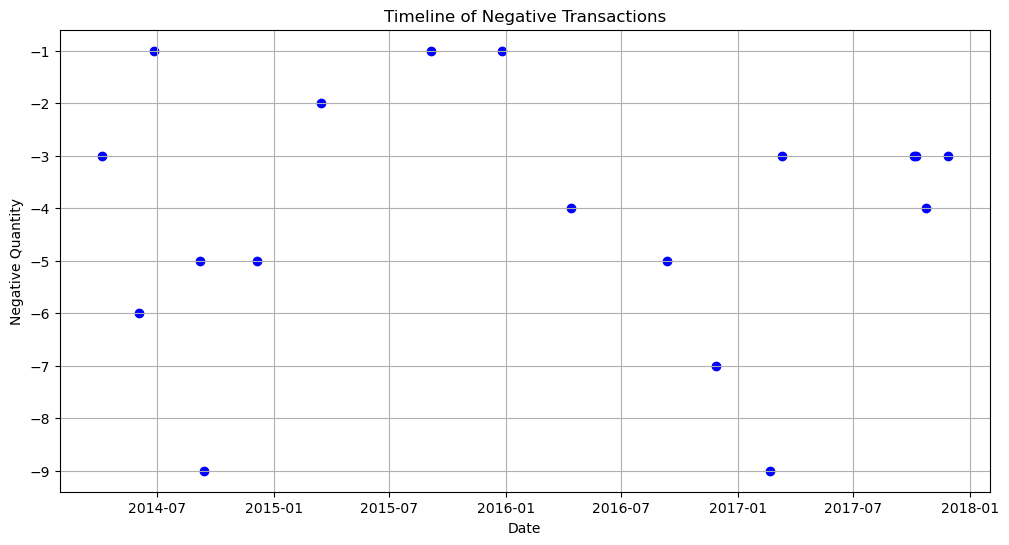

In [91]:
# Creating a timeline of negative transactions
plt.figure(figsize=(12, 6))
negative_quantities['date_ordered'] = pd.to_datetime(negative_quantities['date_ordered'])
plt.scatter(negative_quantities['date_ordered'], negative_quantities['quantity'], color='blue')
plt.title('Timeline of Negative Transactions')
plt.xlabel('Date')
plt.ylabel('Negative Quantity')
plt.grid(True)
plt.show()

In [92]:
# Extracting all transactions for the identified product IDs
specific_product_transactions = df[df['product_id'].isin(['FUR-TA-10001039', 'FUR-TA-10004086'])]

# Reviewing all related transactions to see patterns
all_related_transactions_summary = specific_product_transactions.groupby(['product_id', 'date_ordered', 'quantity', 'profit']).agg({'sales': 'sum'}).reset_index()

# Sorting by date to see the timeline of purchases and returns
all_related_transactions_sorted = all_related_transactions_summary.sort_values(by='date_ordered')

all_related_transactions_sorted.head(20)  



,product_id,date_ordered,quantity,profit,sales
0,FUR-TA-10001039,2014-04-06,-3,-36.1116,154.764
11,FUR-TA-10004086,2014-06-03,-6,113.4936,515.880
1,FUR-TA-10001039,2014-06-27,-1,22.3548,85.980
2,FUR-TA-10001039,2014-09-07,-5,111.7740,429.900
3,FUR-TA-10001039,2014-09-14,-9,-108.3348,464.292
12,FUR-TA-10004086,2014-12-06,-5,-120.3720,214.950
4,FUR-TA-10001039,2015-03-16,-2,44.7096,171.960
5,FUR-TA-10001039,2015-09-06,-1,22.3548,85.980
13,FUR-TA-10004086,2015-12-26,-1,-15.4764,51.588
14,FUR-TA-10004086,2016-04-12,-4,75.6624,343.920


In [93]:
specific_product_transactions

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit,processing_time
1129,CA-2016-112102,2016-04-12,2016-04-16,Standard Class,BD-11605,Consumer,Springfield,Virginia,22153,South,FUR-TA-10004086,Furniture,Tables,KI Adjustable-Height Table,343.920,-4,0.00,75.6624,4
1405,US-2014-118486,2014-04-06,2014-04-08,First Class,SD-20485,Home Office,Philadelphia,Pennsylvania,19143,East,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,154.764,-3,0.40,-36.1116,2
1558,CA-2015-112116,2015-03-16,2015-03-18,Second Class,JE-15475,Consumer,Seattle,Washington,98103,West,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,171.960,-2,0.00,44.7096,2
1699,CA-2014-135657,2014-06-03,2014-06-07,Second Class,SC-20725,Consumer,Seattle,Washington,98115,West,FUR-TA-10004086,Furniture,Tables,KI Adjustable-Height Table,515.880,-6,0.00,113.4936,4
2277,CA-2014-104283,2014-06-27,2014-07-01,Standard Class,LM-17065,Consumer,Southaven,Mississippi,38671,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.980,-1,0.00,22.3548,4
2493,CA-2016-146206,2016-09-10,2016-09-14,Second Class,KT-16480,Consumer,Houston,Texas,77095,Central,FUR-TA-10004086,Furniture,Tables,KI Adjustable-Height Table,300.930,-5,0.30,-34.3920,4
3389,CA-2017-148404,2017-10-07,2017-10-11,Standard Class,Dp-13240,Home Office,Charlotte,North Carolina,28205,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,154.764,-3,0.40,-36.1116,4
5094,US-2014-140452,2014-12-06,2014-12-10,Standard Class,BK-11260,Consumer,Chicago,Illinois,60610,Central,FUR-TA-10004086,Furniture,Tables,KI Adjustable-Height Table,214.950,-5,0.50,-120.3720,4
5124,CA-2014-160766,2014-09-14,2014-09-14,Same Day,DM-13015,Consumer,New York City,New York,10009,East,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,464.292,-9,0.40,-108.3348,0
5293,CA-2015-111073,2015-12-26,2015-12-30,Standard Class,MC-18100,Consumer,Medina,Ohio,44256,East,FUR-TA-10004086,Furniture,Tables,KI Adjustable-Height Table,51.588,-1,0.40,-15.4764,4


**Transaction Review for Specific Product IDs**

Here's a snapshot of the transactions for the two product IDs identified with negative quantities, sorted by date:

- Transactions involve both negative and positive quantities over several years, suggesting ongoing sales and returns issues.
- Negative quantities consistently result in financial losses, as shown in the profit column, but there are instances where a negative quantity still results in a positive profit, indicating possible restocking fees or partial refunds.

**Observations:**
- **Recurring Issues:** Both product IDs have multiple instances of negative quantities spread over different years, indicating a recurring issue rather than a one-time event.
- **Impact on Profit:** Most negative quantity transactions result in financial losses, impacting overall profitability.
- **Dates of Transactions:** The spread of dates may indicate that these problems are not linked to specific batches or short-term issues but may be related to the product type or policies.


**Recommendations:**

1. **Quality Review:** Conduct a thorough review of these specific products, focusing on customer feedback, return reasons, and quality checks to identify potential improvements or corrective actions.

2. **Policy Evaluation:** Assess the return policy and customer service responses to these products to ensure that they are aligned with minimizing losses and improving customer satisfaction.

3. **Customer Follow-up:** Engage with customers who have returned these products to understand their dissatisfaction or issues, which could provide direct insights into potential improvements.


### Discount

In [94]:
# Basic statistics for the 'Discount' column
df['discount'].describe()

count    9993.000000
mean        0.156188
std         0.206457
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: discount, dtype: float64

In [95]:
# Frequency distribution of different discount levels
df['discount'].value_counts().sort_index()


discount
0.00    4798
0.10      94
0.15      52
0.20    3657
0.30     226
0.32      27
0.40     206
0.45      11
0.50      66
0.60     138
0.70     418
0.80     300
Name: count, dtype: int64

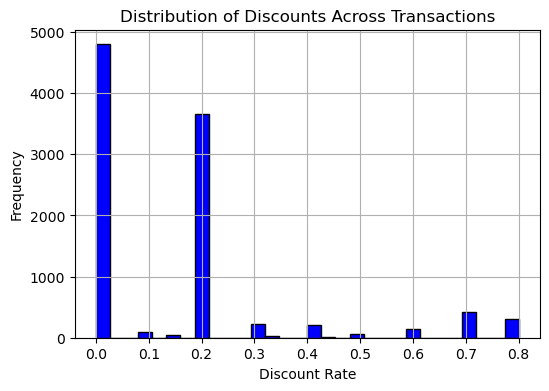

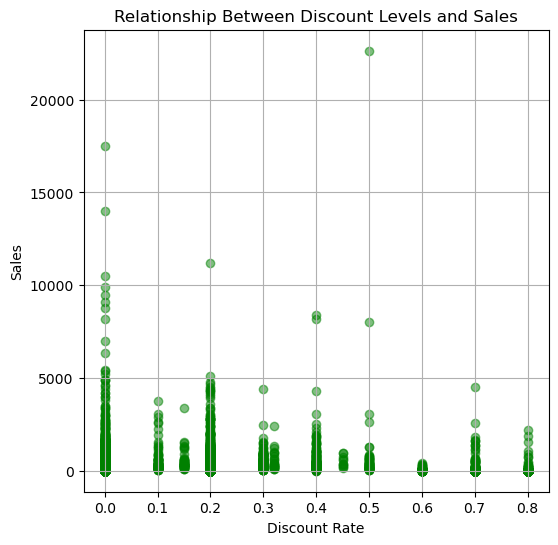

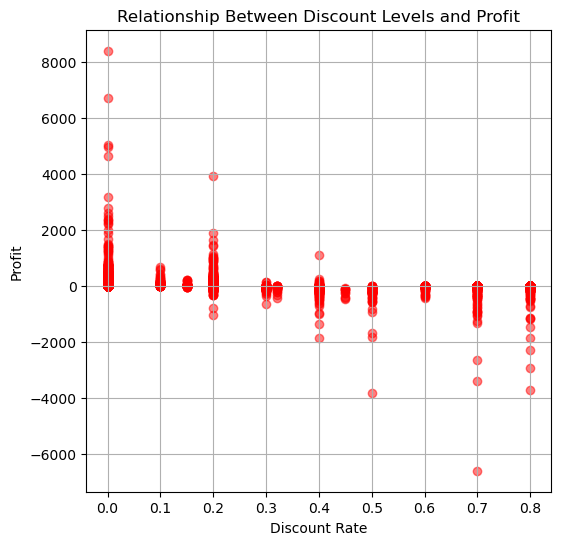

In [96]:
import matplotlib.pyplot as plt

# Histogram of discount distribution
plt.figure(figsize=(6, 4))
df['discount'].hist(bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Discounts Across Transactions')
plt.xlabel('Discount Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Scatter plot to examine relationship between discount levels and sales
plt.figure(figsize=(6, 6))
plt.scatter(df['discount'], df['sales'], alpha=0.5, color='green')
plt.title('Relationship Between Discount Levels and Sales')
plt.xlabel('Discount Rate')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Scatter plot to examine relationship between discount levels and profit
plt.figure(figsize=(6, 6))
plt.scatter(df['discount'], df['profit'], alpha=0.5, color='red')
plt.title('Relationship Between Discount Levels and Profit')
plt.xlabel('Discount Rate')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


**Histogram of Discount Distribution:**

- The histogram shows a significant number of transactions at 0% discount, with another peak at 20%. The distribution suggests that most discounts are either very low or around the 20% mark, which might be a common promotional discount rate.
- Higher discounts (70% and 80%) are less common but still notable, which could be related to specific promotional events or clearance strategies.

**Scatter Plot of Discount Levels vs. Sales:**

- This plot shows a wide dispersion in sales across different discount levels. There does not appear to be a clear trend linking discount rate with higher sales, indicating that discounts do not consistently lead to higher sales volumes.

**Scatter Plot of Discount Levels vs. Profit:**

- The relationship between discounts and profit shows that higher discounts often correlate with lower profits, and in some cases, significant losses (note the data points with high discounts and negative profits). This suggests that while discounts may drive sales, they can negatively impact profitability, especially at higher rates.


### Profit

In [97]:
# Basic statistics for the 'Profit' column
df['profit'].describe()

count    9990.000000
mean       28.664176
std       234.306232
min     -6599.978000
25%         1.731375
50%         8.671250
75%        29.364000
max      8399.976000
Name: profit, dtype: float64

- There are noticeable extreme values (both positive and negative), suggesting some transactions are highly impactful to overall profitability.
- The range of profit values is broad, indicating a diverse set of outcomes in terms of profitability, which could be influenced by factors like sales volume, discount rates, product types, and operational costs.

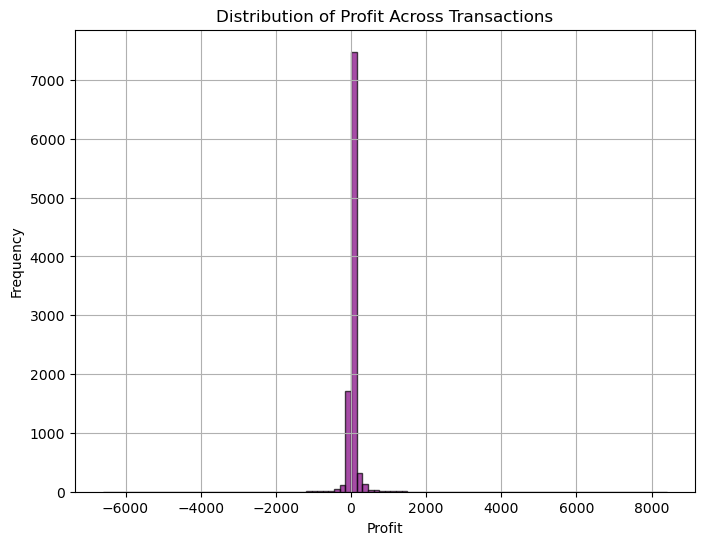

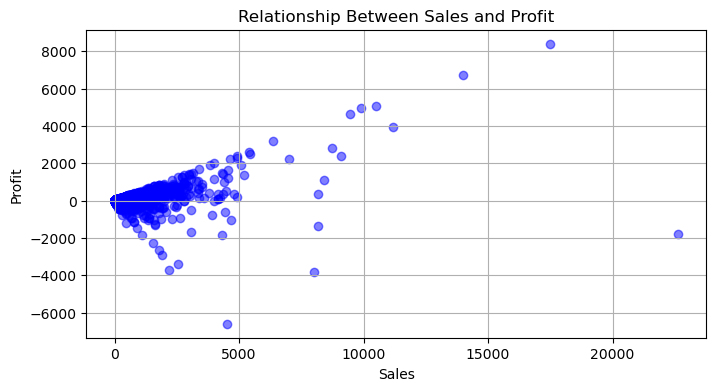

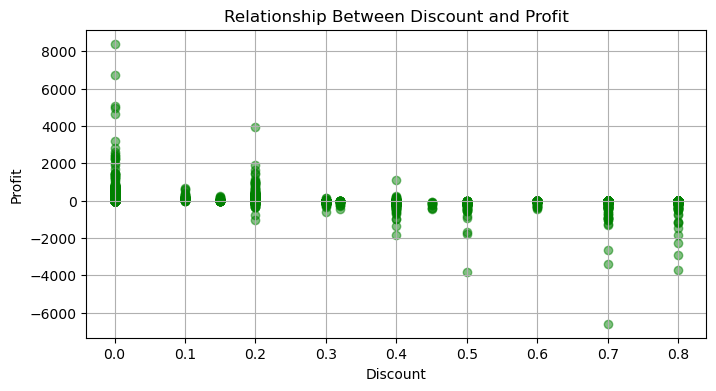

In [98]:
# Histogram of profit distribution
plt.figure(figsize=(8, 6))
df['profit'].plot(kind='hist', bins=100, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribution of Profit Across Transactions')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Scatter plot of Profit vs. Sales
plt.figure(figsize=(8, 4))
plt.scatter(df['sales'], df['profit'], alpha=0.5, color='blue')
plt.title('Relationship Between Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# Scatter plot of Profit vs. Discount
plt.figure(figsize=(8, 4))
plt.scatter(df['discount'], df['profit'], alpha=0.5, color='green')
plt.title('Relationship Between Discount and Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


**Histogram of Profit Distribution:**

- The histogram shows a skewed distribution with a concentration of profits near the lower end, indicating that most transactions yield moderate profits.
- There are tails on both the positive and negative sides, showing that while most profits are modest, there are significant outliers with very high profits or losses.

**Scatter Plot of Profit vs. Sales:**

- This plot shows a positive correlation between sales and profit. Higher sales generally correlate with higher profits, but the variance is notable, suggesting that other factors (such as cost of goods sold, operational efficiency, and discounting strategies) also significantly impact profitability.
- There are some high-sales transactions with relatively low profit, indicating that simply increasing sales does not guarantee proportionally higher profits.

**Scatter Plot of Profit vs. Discount:**

- The relationship between discounts and profit appears to be generally negative; higher discounts often correlate with lower profits, reflecting the impact of reduced sale prices on profit margins.
- The cluster of data points at lower discounts shows varying levels of profit, highlighting that small discounts do not necessarily harm profitability significantly, but larger discounts tend to result in lower or negative profits.


In [99]:
# Specify the path for the new CSV file
output_file_path = '../data/updated_ecommerce.csv'

# Write the updated dataset to a new CSV file
df.to_csv(output_file_path, index=False)

output_file_path


'../data/updated_ecommerce.csv'

In [100]:
df

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit,processing_time
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,5
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,5
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,5


In [101]:
df.isna().sum()

order_id            0
date_ordered        0
date_shipped        0
ship_mode           0
customer_id         0
segment             0
city                0
state               0
postal_code         0
region              0
product_id          0
category            0
subcategory         0
product_name        0
sales              52
quantity            0
discount            0
profit              3
processing_time     0
dtype: int64

In [102]:
# Dropping rows with null values (for now)
cleaned_data = df.dropna()
cleaned_data

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit,processing_time
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,5
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,5
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,5


In [103]:
# Specify the path for the new CSV file
output_file_path = '../data/cleaned_ecommerce.csv'

# Write the updated dataset to a new CSV file
cleaned_data.to_csv(output_file_path, index=False)

output_file_path

'../data/cleaned_ecommerce.csv'